In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [258]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv').drop('id', axis=1)
main = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv').drop('id', axis=1)

In [259]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [260]:
main.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [261]:
main['price'] = main['price'].str.replace('$', '').str.replace(',', '').astype(float)
main['milage'] = main['milage'].str.replace('mi.', '').str.replace(',', '').astype(float)

In [262]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [263]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   object 
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [264]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         125690 non-null  object
 1   model         125690 non-null  object
 2   model_year    125690 non-null  int64 
 3   milage        125690 non-null  int64 
 4   fuel_type     122307 non-null  object
 5   engine        125690 non-null  object
 6   transmission  125690 non-null  object
 7   ext_col       125690 non-null  object
 8   int_col       125690 non-null  object
 9   accident      124058 non-null  object
 10  clean_title   111451 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.5+ MB


In [265]:
def checking(df):
    total = len(df)
    check_df = pd.DataFrame(df.isnull().sum(), columns=['#NULLS'])
    check_df['%NULLS'] = round((check_df['#NULLS']/total)*100, 5)
    check_df['#Unique_Valus'] = df.nunique()
    cat_cols = [col for col in df.columns if df[col].dtype == 'object']
    uniques = []
    for col in df.columns:
        if col in cat_cols:
            uniques.append(set(df[col].dropna()))
        else:
            uniques.append(df[col].max() - df[col].min())
    check_df['Unique_Values/Range'] = uniques
    return check_df

In [266]:
checking(train)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.00000,57,"{Mitsubishi, Saturn, Lucid, Hyundai, Chrysler,..."
model,0,0.00000,1897,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.00000,34,50
milage,0,0.00000,6651,404900
fuel_type,5083,2.69608,7,"{Diesel, E85 Flex Fuel, Hybrid, –, Plug-In Hyb..."
engine,0,0.00000,1117,"{255.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,..."
transmission,0,0.00000,52,"{7-Speed DCT Automatic, 7-Speed M/T, Single-Sp..."
ext_col,0,0.00000,319,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.00000,156,"{AMG Black, Rioja Red, Oyster/Black, Dark Gray..."
accident,2452,1.30057,2,"{None reported, At least 1 accident or damage ..."


In [267]:
checking(main)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.00000,57,"{Mitsubishi, Saturn, Lucid, Hyundai, Chrysler,..."
model,0,0.00000,1898,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.00000,34,50
milage,0,0.00000,2818,404900.0
fuel_type,170,4.24046,7,"{Diesel, E85 Flex Fuel, Hybrid, –, Plug-In Hyb..."
engine,0,0.00000,1146,"{6.6L V8 16V GDI OHV, 255.0HP 4.8L 8 Cylinder ..."
transmission,0,0.00000,62,"{7-Speed DCT Automatic, Automatic, 10-Spd, 7-S..."
ext_col,0,0.00000,319,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.00000,156,"{AMG Black, Rioja Red, Dark Gray, Oyster/Black..."
accident,113,2.81866,2,"{None reported, At least 1 accident or damage ..."


In [268]:
checking(test)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.00000,55,"{Mitsubishi, Saturn, Lucid, Chrysler, Hyundai,..."
model,0,0.00000,1891,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.00000,36,50
milage,0,0.00000,5700,404900
fuel_type,3383,2.69154,7,"{Diesel, Hybrid, E85 Flex Fuel, –, Plug-In Hyb..."
engine,0,0.00000,1117,"{6.6L V8 16V GDI OHV, 255.0HP 4.8L 8 Cylinder ..."
transmission,0,0.00000,52,"{7-Speed DCT Automatic, 7-Speed M/T, Single-Sp..."
ext_col,0,0.00000,317,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.00000,156,"{AMG Black, Rioja Red, Dark Gray, Oyster/Black..."
accident,1632,1.29843,2,"{None reported, At least 1 accident or damage ..."


In [269]:
def feature_engineering(df):

    # Feature 1: Age of the vehicle
    df['age'] = 2024 - df['model_year']

    # Feature 2: Mileage per year
    df['milage_per_year'] = df['milage'] / df['age']
    inf_mask = df['milage_per_year'].replace([float('inf'), -float('inf')], np.nan).isna()
    df.loc[inf_mask, 'milage_per_year'] = df.loc[inf_mask, 'milage'] / (df.loc[inf_mask, 'age'] + 0.75)
    
    # Feature 3: Extracting horsepower (HP) from the engine column
    df['horsepower'] = df['engine'].str.extract(r'(\d+\.\d+)HP').astype(float)

    # Feature 4: Extracting engine displacement (L) from the engine column
    df['engine_displacement'] = df['engine'].str.extract(r'(\d+\.\d+)L').astype(float)

    # Feature 5: Extracting the number of cylinders from the engine column
    df['number_cylinders'] = df['engine'].str.extract(r'(\d+ Cylinder)').astype(str)
    df['number_cylinders'] = df['number_cylinders'].replace('nan', np.nan)

    # Feature 6: Extracting the type of fuel from the engine column
    df['engine_fuel_type'] = df['engine'].str.extract(r'Engine (.+ Fuel)').astype(str)
    df['engine_fuel_type'] = df['engine_fuel_type'].replace('nan', np.nan)
    
    df = df.drop('engine', axis=1)
    return df

In [270]:
train = feature_engineering(train)
checking(train)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.00000,57,"{Mitsubishi, Saturn, Lucid, Hyundai, Chrysler,..."
model,0,0.00000,1897,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.00000,34,50
milage,0,0.00000,6651,404900
fuel_type,5083,2.69608,7,"{Diesel, E85 Flex Fuel, Hybrid, –, Plug-In Hyb..."
transmission,0,0.00000,52,"{7-Speed DCT Automatic, 7-Speed M/T, Single-Sp..."
ext_col,0,0.00000,319,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.00000,156,"{AMG Black, Rioja Red, Oyster/Black, Dark Gray..."
accident,2452,1.30057,2,"{None reported, At least 1 accident or damage ..."
clean_title,21419,11.36088,1,{Yes}


In [271]:
main = feature_engineering(main)
checking(main)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.00000,57,"{Mitsubishi, Saturn, Lucid, Hyundai, Chrysler,..."
model,0,0.00000,1898,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.00000,34,50
milage,0,0.00000,2818,404900.0
fuel_type,170,4.24046,7,"{Diesel, E85 Flex Fuel, Hybrid, –, Plug-In Hyb..."
transmission,0,0.00000,62,"{7-Speed DCT Automatic, Automatic, 10-Spd, 7-S..."
ext_col,0,0.00000,319,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.00000,156,"{AMG Black, Rioja Red, Dark Gray, Oyster/Black..."
accident,113,2.81866,2,"{None reported, At least 1 accident or damage ..."
clean_title,596,14.86655,1,{Yes}


In [272]:
test = feature_engineering(test)
checking(test)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.00000,55,"{Mitsubishi, Saturn, Lucid, Chrysler, Hyundai,..."
model,0,0.00000,1891,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.00000,36,50
milage,0,0.00000,5700,404900
fuel_type,3383,2.69154,7,"{Diesel, Hybrid, E85 Flex Fuel, –, Plug-In Hyb..."
transmission,0,0.00000,52,"{7-Speed DCT Automatic, 7-Speed M/T, Single-Sp..."
ext_col,0,0.00000,317,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.00000,156,"{AMG Black, Rioja Red, Dark Gray, Oyster/Black..."
accident,1632,1.29843,2,"{None reported, At least 1 accident or damage ..."
clean_title,14239,11.32867,1,{Yes}


In [273]:
def null_handling(df):
        
    df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
    df['engine_displacement'] = df['engine_displacement'].fillna(df['engine_displacement'].mean())
    df['number_cylinders'] = df['number_cylinders'].fillna(df['number_cylinders'].mode()[0])
    df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])
    df['accident'] = df['accident'].fillna(df['accident'].mode()[0])
    df['engine_fuel_type'] = df['engine_fuel_type'].fillna(df['engine_fuel_type'].mode()[0])
    df['clean_title'] = df['clean_title'].fillna('No')
    
    return df

In [274]:
train = null_handling(train)
checking(train)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.0,57,"{Mitsubishi, Saturn, Lucid, Hyundai, Chrysler,..."
model,0,0.0,1897,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.0,34,50
milage,0,0.0,6651,404900
fuel_type,0,0.0,7,"{Diesel, E85 Flex Fuel, Hybrid, –, Plug-In Hyb..."
transmission,0,0.0,52,"{7-Speed DCT Automatic, 7-Speed M/T, Single-Sp..."
ext_col,0,0.0,319,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.0,156,"{AMG Black, Rioja Red, Oyster/Black, Dark Gray..."
accident,0,0.0,2,"{None reported, At least 1 accident or damage ..."
clean_title,0,0.0,2,"{Yes, No}"


In [275]:
main = null_handling(main)
checking(main)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.0,57,"{Mitsubishi, Saturn, Lucid, Hyundai, Chrysler,..."
model,0,0.0,1898,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.0,34,50
milage,0,0.0,2818,404900.0
fuel_type,0,0.0,7,"{Diesel, E85 Flex Fuel, Hybrid, –, Plug-In Hyb..."
transmission,0,0.0,62,"{7-Speed DCT Automatic, Automatic, 10-Spd, 7-S..."
ext_col,0,0.0,319,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.0,156,"{AMG Black, Rioja Red, Dark Gray, Oyster/Black..."
accident,0,0.0,2,"{None reported, At least 1 accident or damage ..."
clean_title,0,0.0,2,"{Yes, No}"


In [276]:
test = null_handling(test)
checking(test)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
brand,0,0.0,55,"{Mitsubishi, Saturn, Lucid, Chrysler, Hyundai,..."
model,0,0.0,1891,"{Ram 1500 Laramie, Grand Caravan R/T, Fusion H..."
model_year,0,0.0,36,50
milage,0,0.0,5700,404900
fuel_type,0,0.0,7,"{Diesel, Hybrid, E85 Flex Fuel, –, Plug-In Hyb..."
transmission,0,0.0,52,"{7-Speed DCT Automatic, 7-Speed M/T, Single-Sp..."
ext_col,0,0.0,317,"{Indus Silver, Navarra Blue, Firenze Red, Ingo..."
int_col,0,0.0,156,"{AMG Black, Rioja Red, Dark Gray, Oyster/Black..."
accident,0,0.0,2,"{None reported, At least 1 accident or damage ..."
clean_title,0,0.0,2,"{Yes, No}"


In [277]:
def outliers_detection(df, q1_coef=0.25, q3_coef=0.75):
    data_out = df.copy()
    outlier_counts = {}

    cat_cols = [col for col in data_out.columns if data_out[col].dtype == 'object']
    num_cols = [col for col in data_out.columns if col not in cat_cols]

    for col in num_cols:
        q1=data_out[col].quantile(q1_coef)
        q3=data_out[col].quantile(q3_coef)
        iqr = q3 - q1
        outlier_counts[col]=[len(data_out[(data_out[col]<q1-1.5*iqr) | (data_out[col]>q3+1.5*iqr)])]

    for col in cat_cols:
        value_counts = data_out[col].value_counts()
        threshold = 0.0001*len(data_out)
        rare_values = value_counts[value_counts<threshold].index
        outlier_counts[col]=[len(data_out[data_out[col].isin(rare_values)])]

    outlier_df = pd.DataFrame(outlier_counts).T
    outlier_df.columns = ['Number of Outliers']
    return outlier_df

In [278]:
outliers_detection(train)

,Number of Outliers
model_year,5132
milage,1766
price,10880
age,5132
milage_per_year,6477
horsepower,5696
engine_displacement,422
brand,52
model,4327
fuel_type,15


In [279]:
outliers_detection(main)

,Number of Outliers
model_year,67
milage,69
price,244
age,67
milage_per_year,97
horsepower,177
engine_displacement,7
brand,0
model,0
fuel_type,0


In [280]:
outliers_detection(test)

,Number of Outliers
model_year,3516
milage,1353
age,3516
milage_per_year,4249
horsepower,3794
engine_displacement,286
brand,37
model,3180
fuel_type,0
transmission,61


<Axes: >

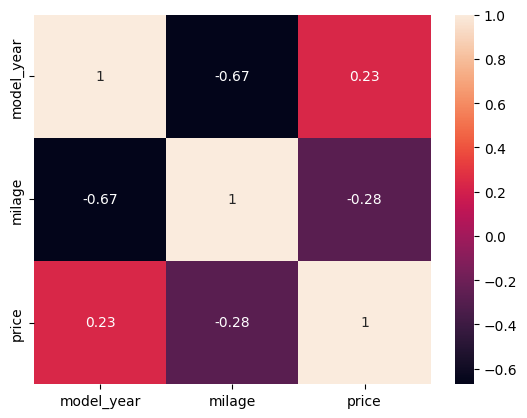

In [281]:
sns.heatmap(train[['model_year', 'milage', 'price']].corr(), annot=True)

<Axes: >

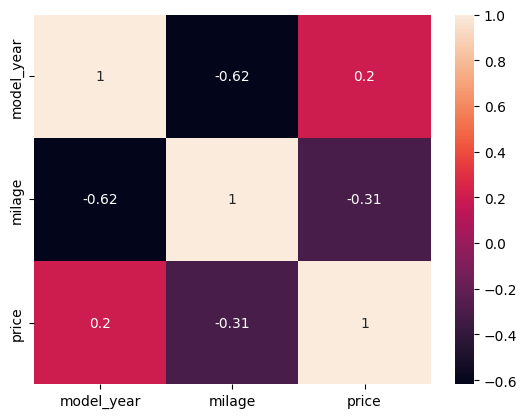

In [282]:
sns.heatmap(main[['model_year', 'milage', 'price']].corr(), annot=True)

In [283]:
def draw_plots(df):
    numeric_columns = df.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        plt.figure(figsize=(14, 6))

        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Box Plot of {col}')

        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(df[col], kde=True, color='lightgreen')
        plt.title(f'Histogram of {col}')

        plt.tight_layout()
        plt.show()

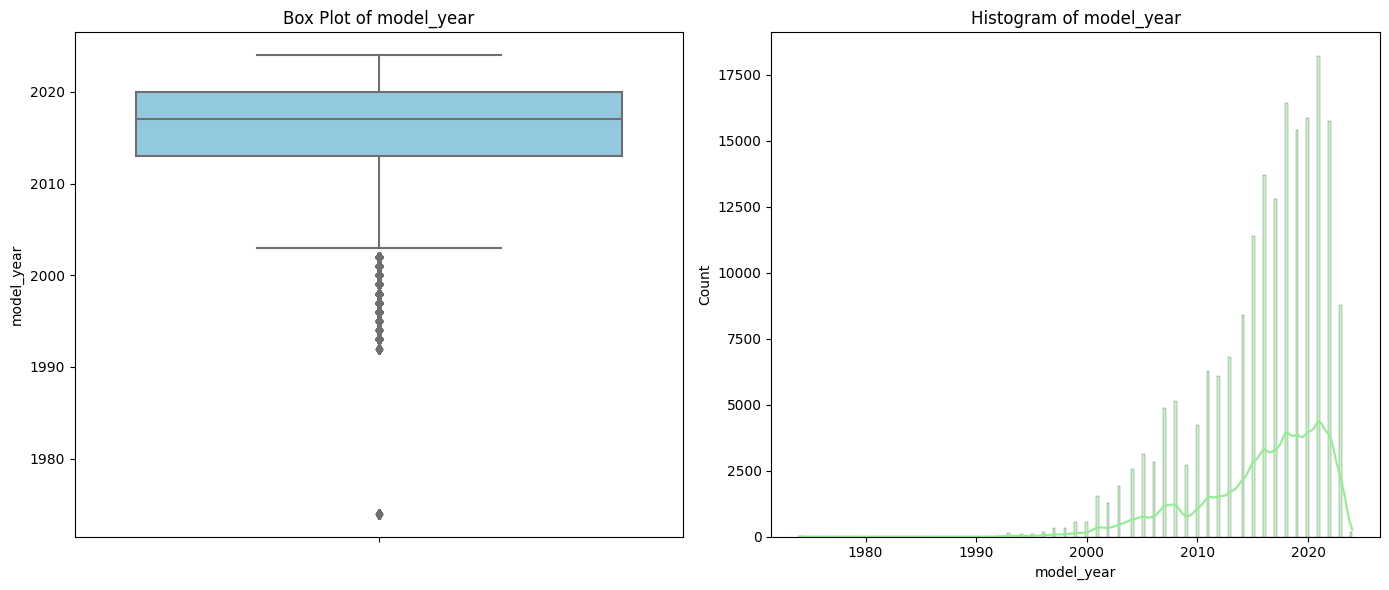

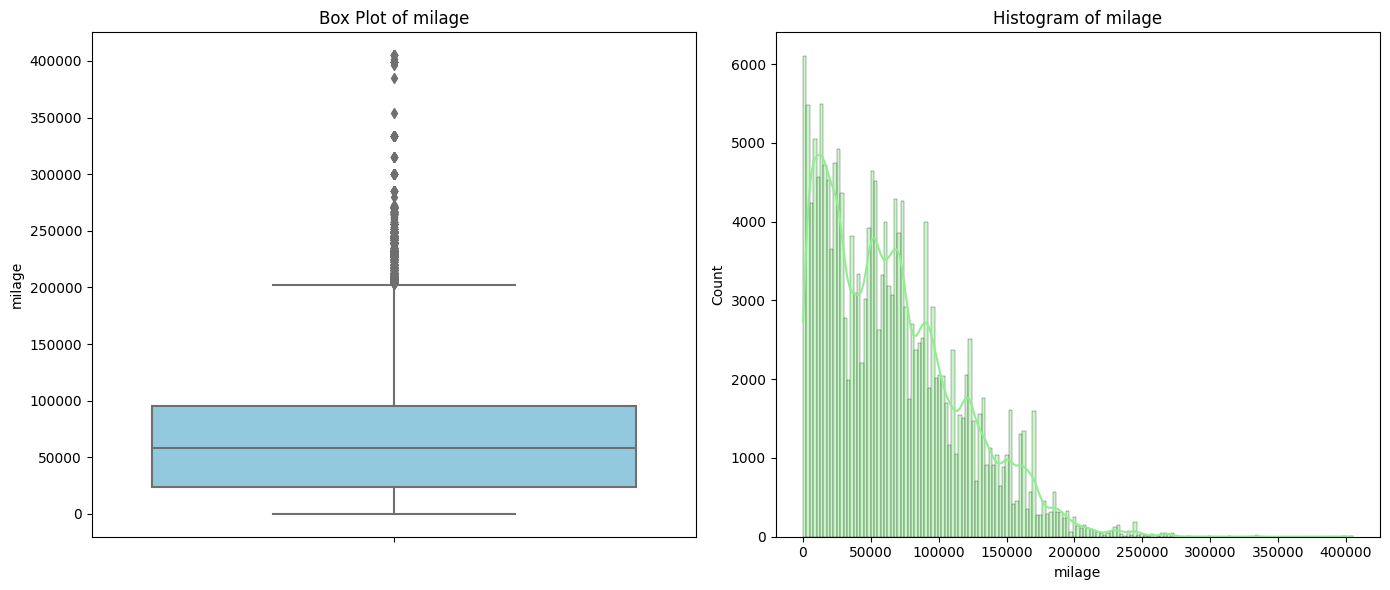

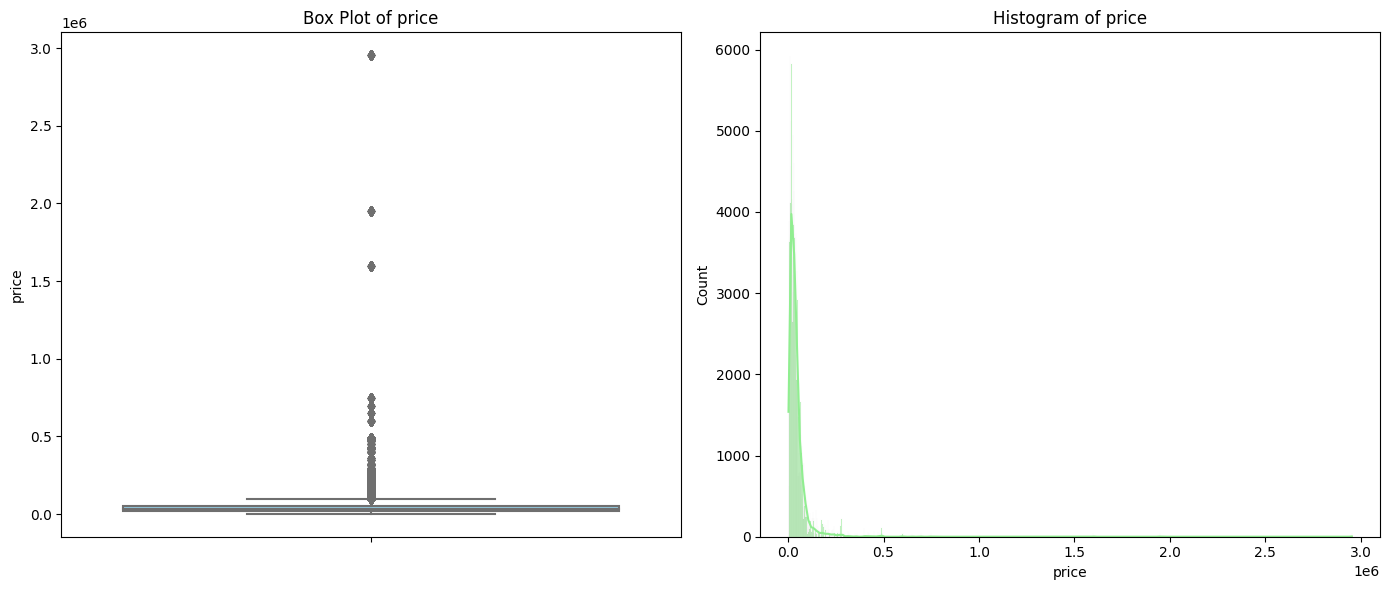

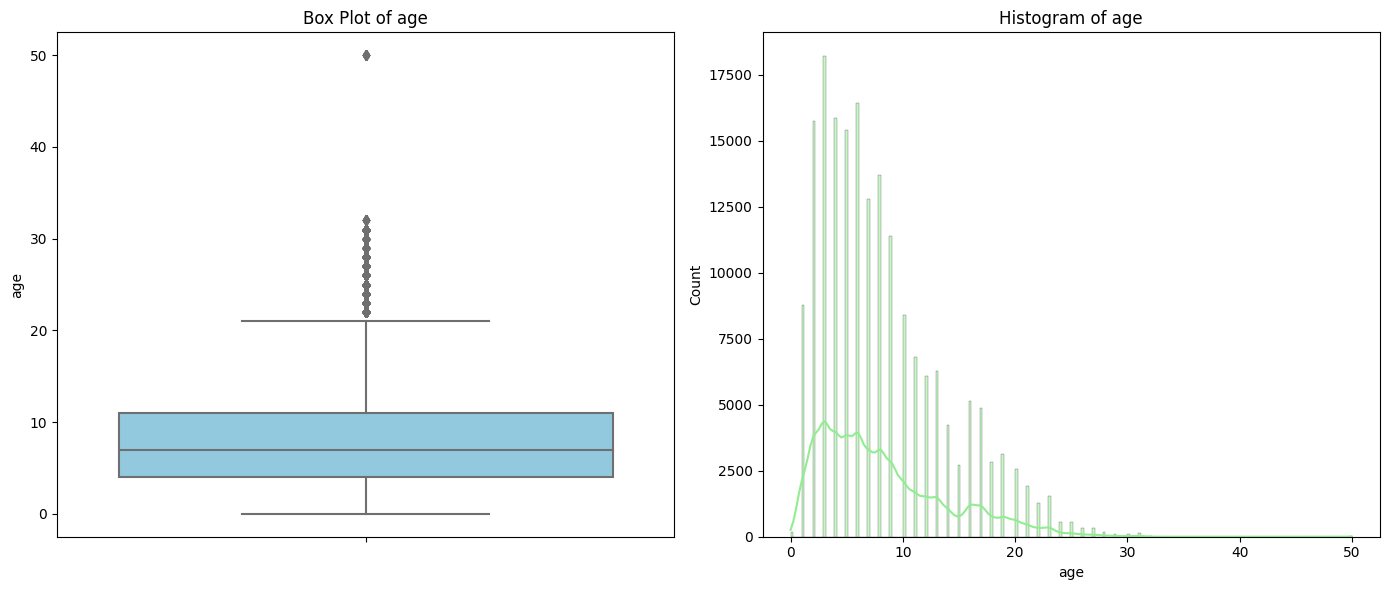

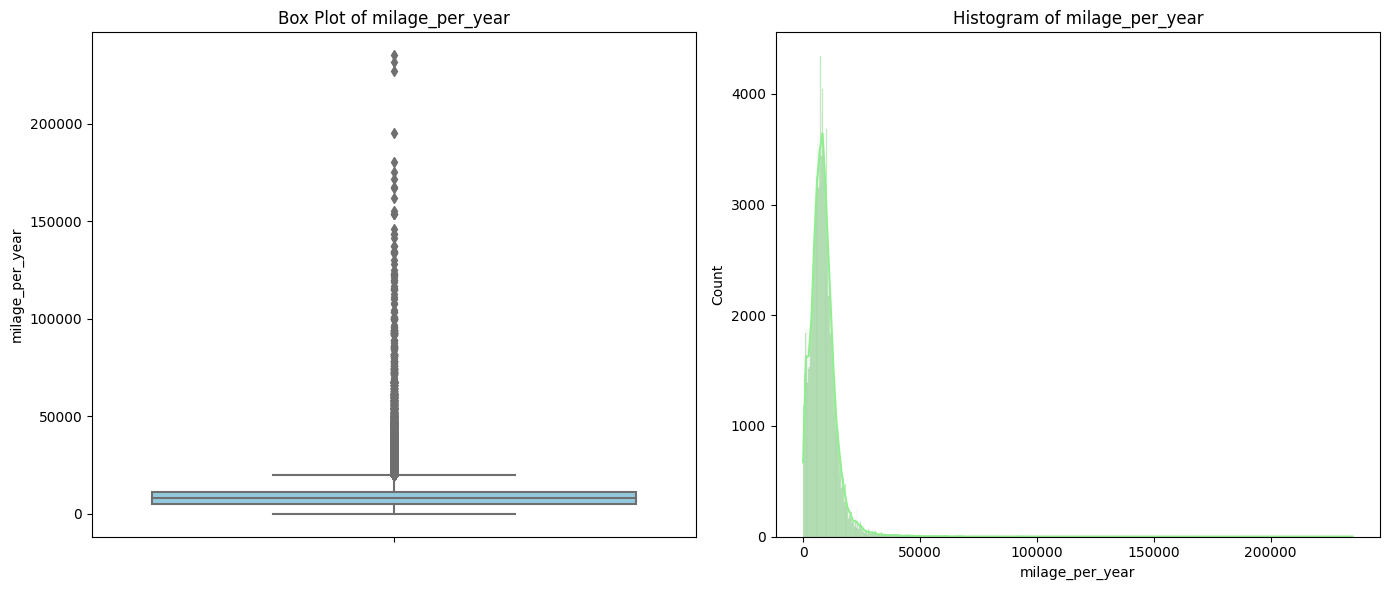

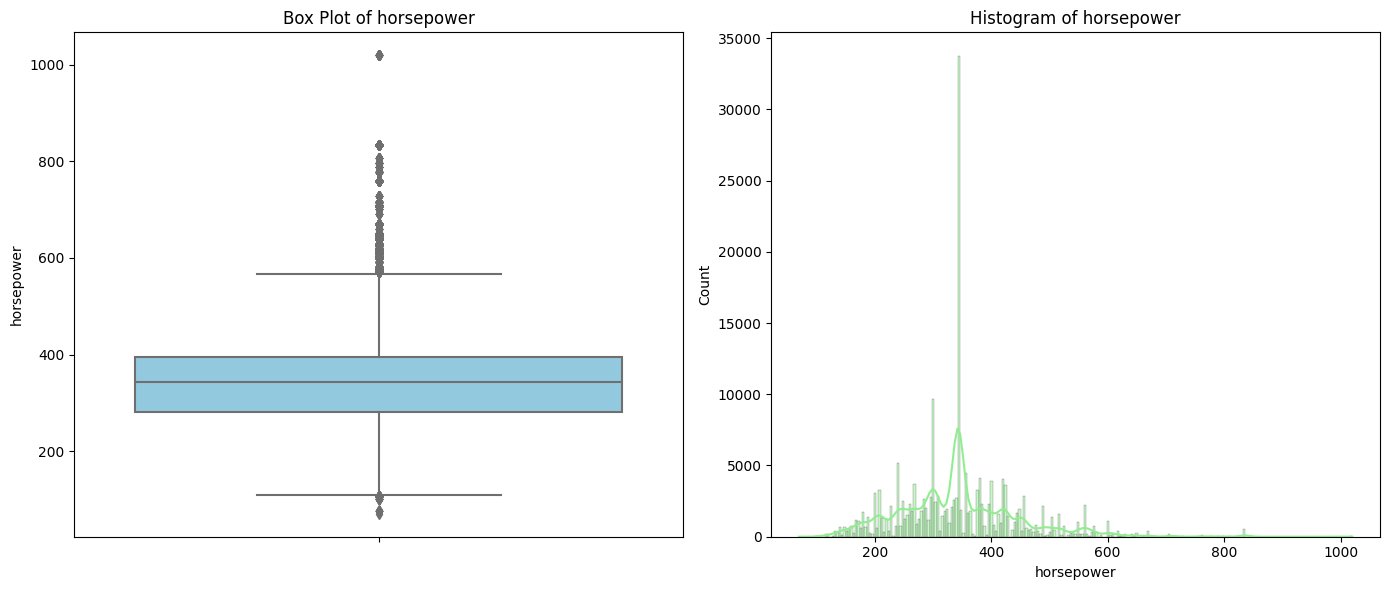

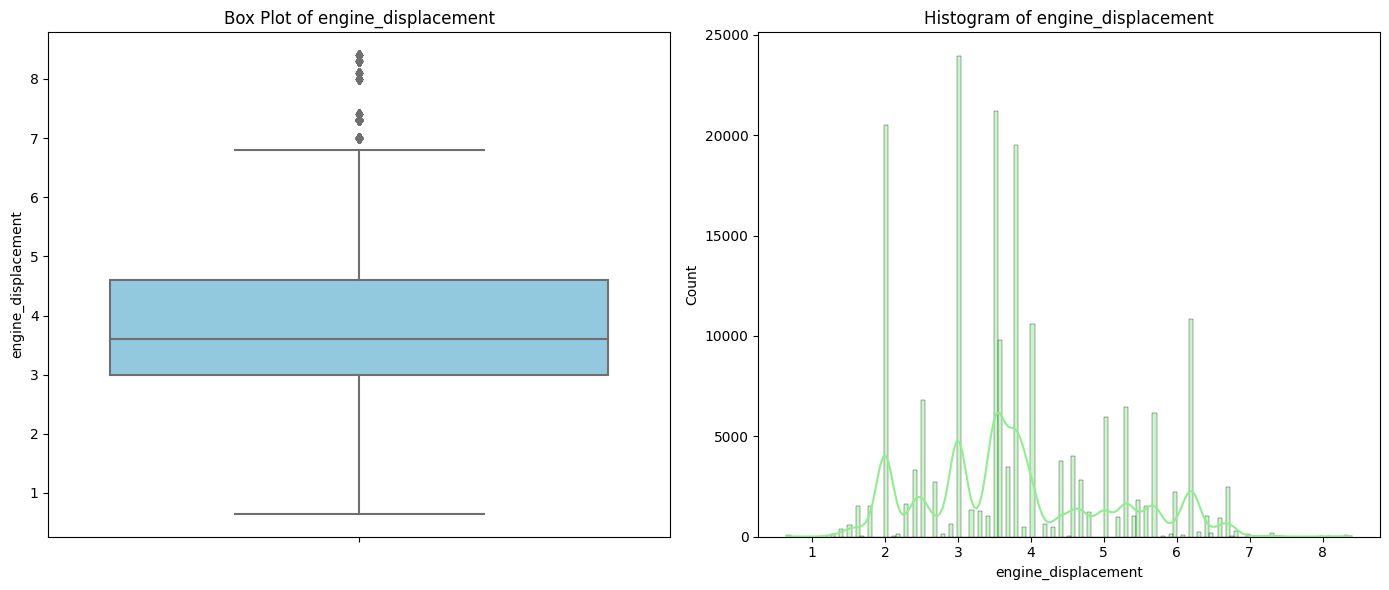

In [284]:
draw_plots(train)

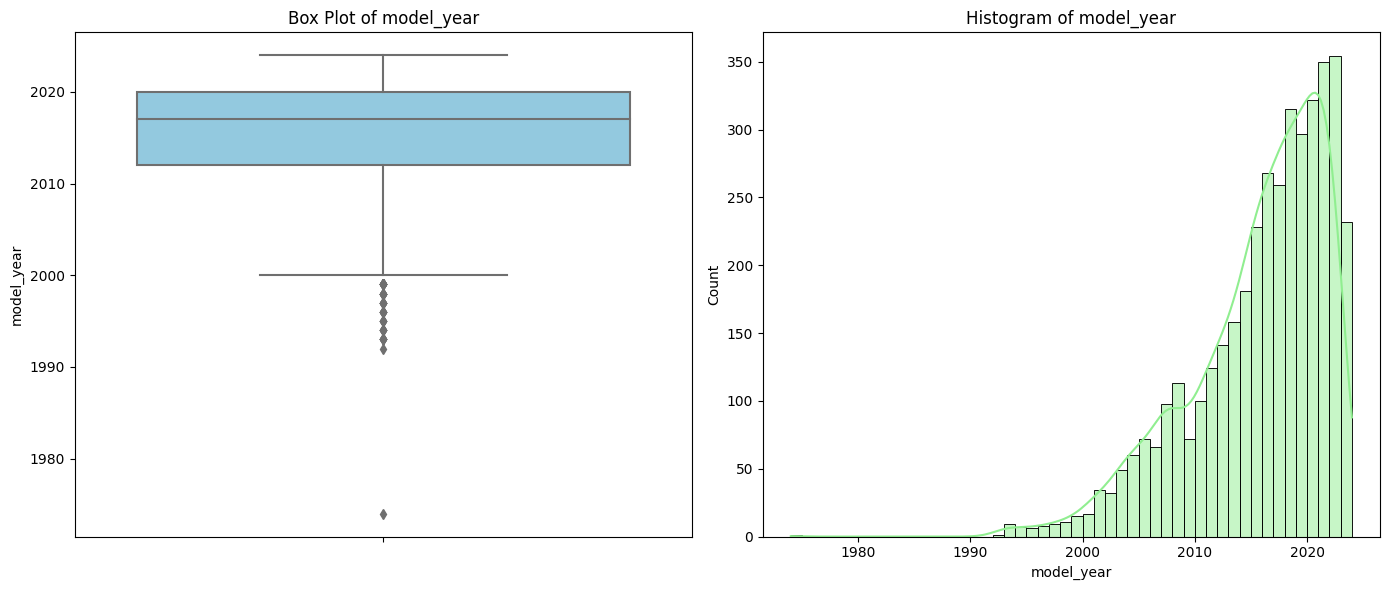

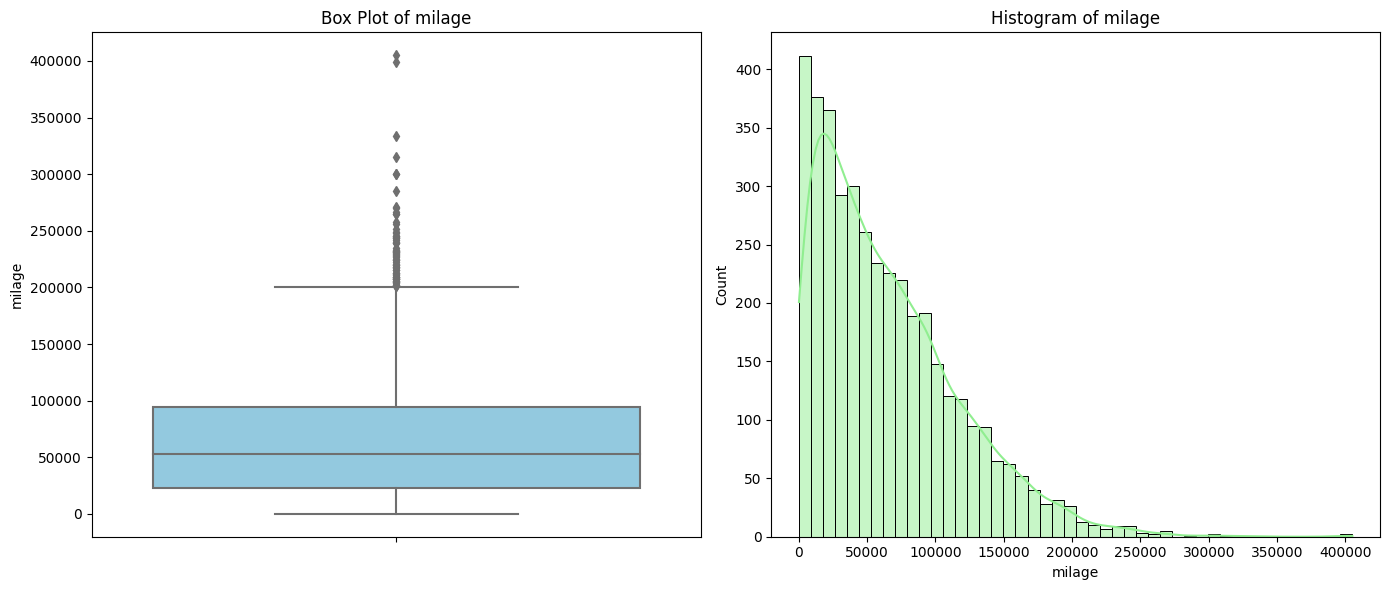

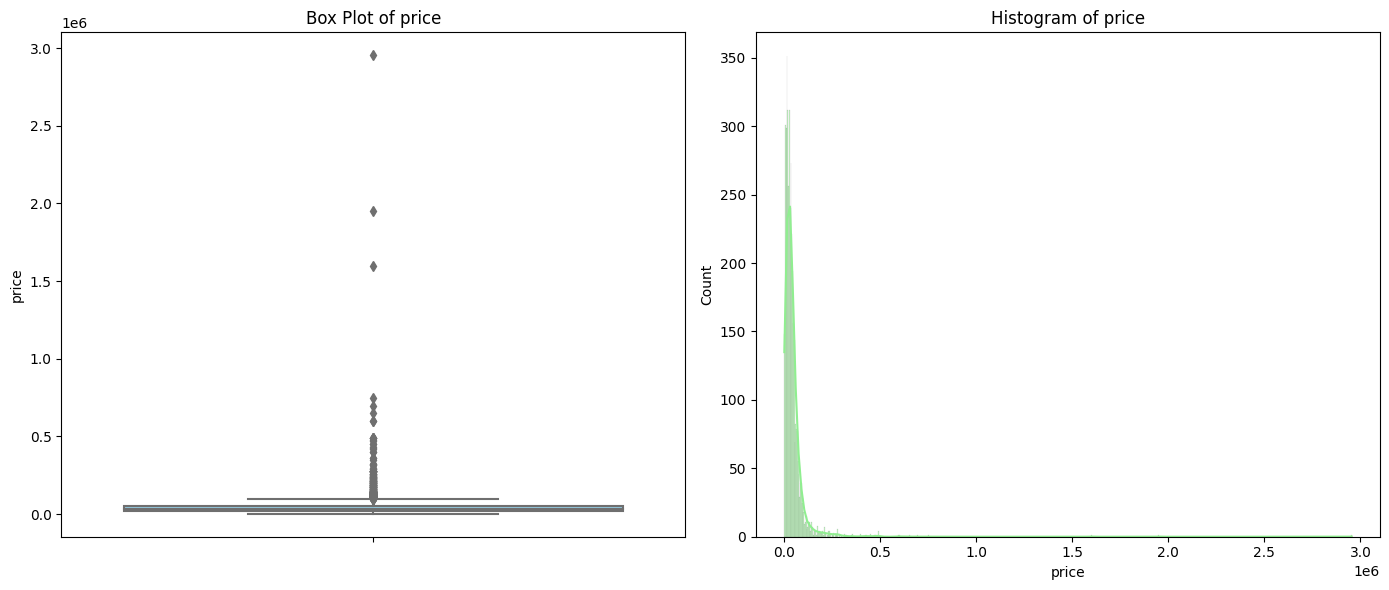

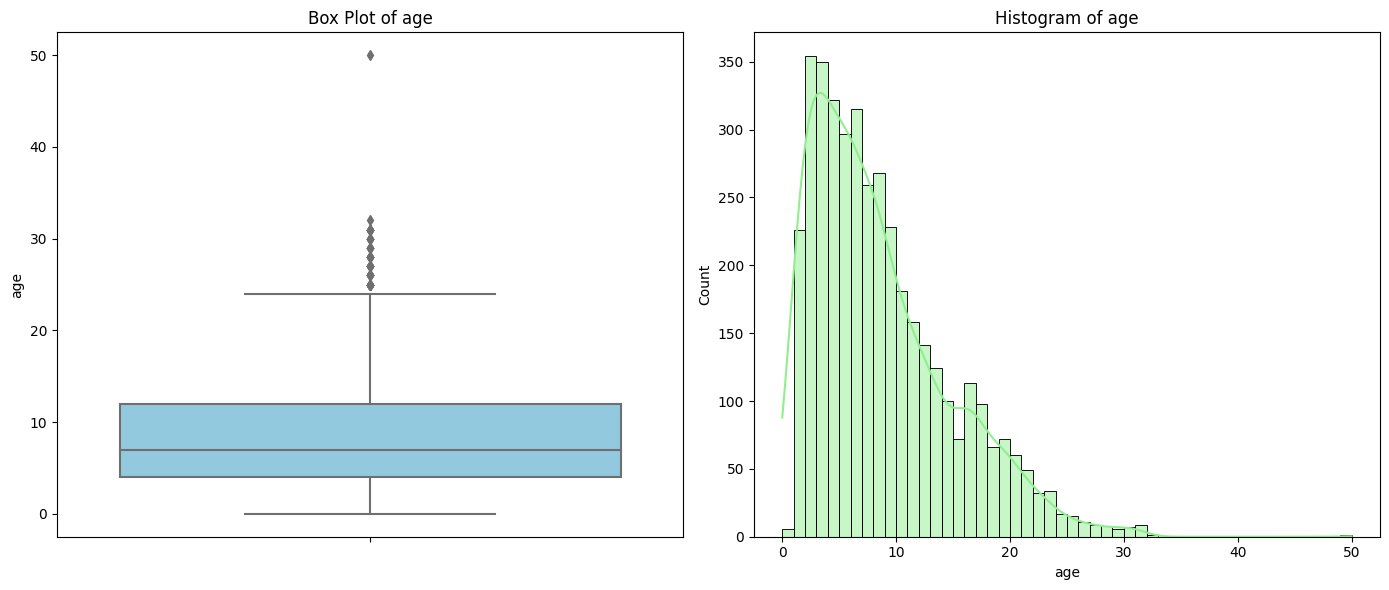

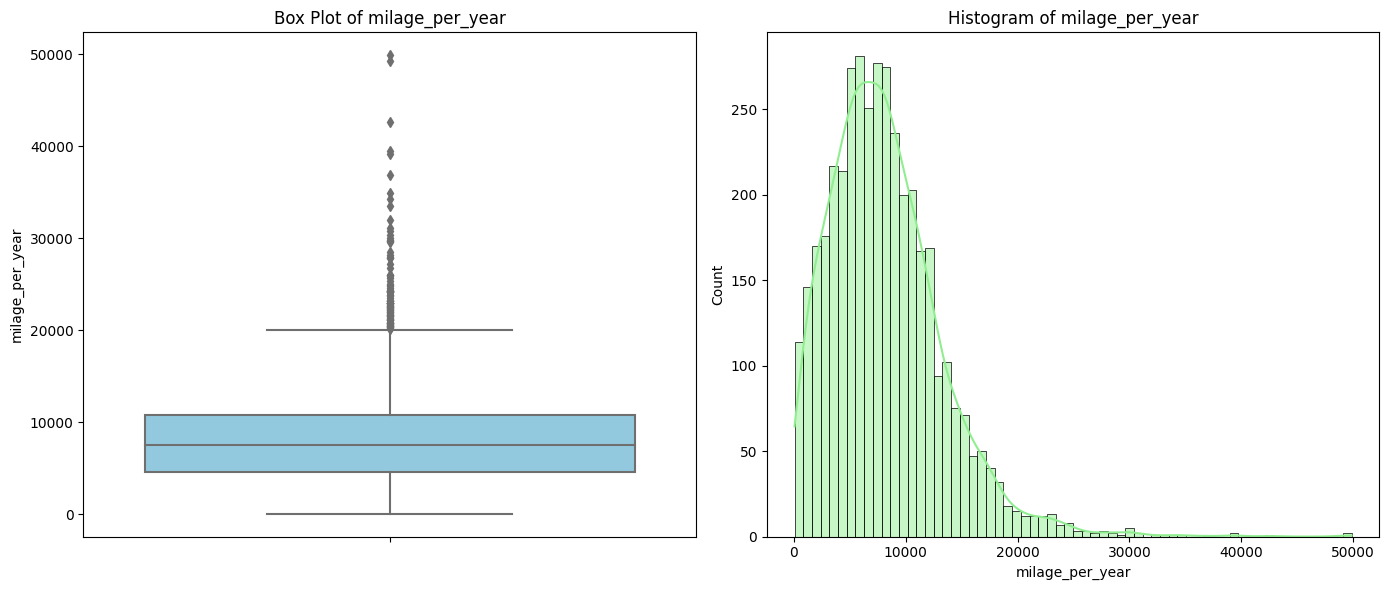

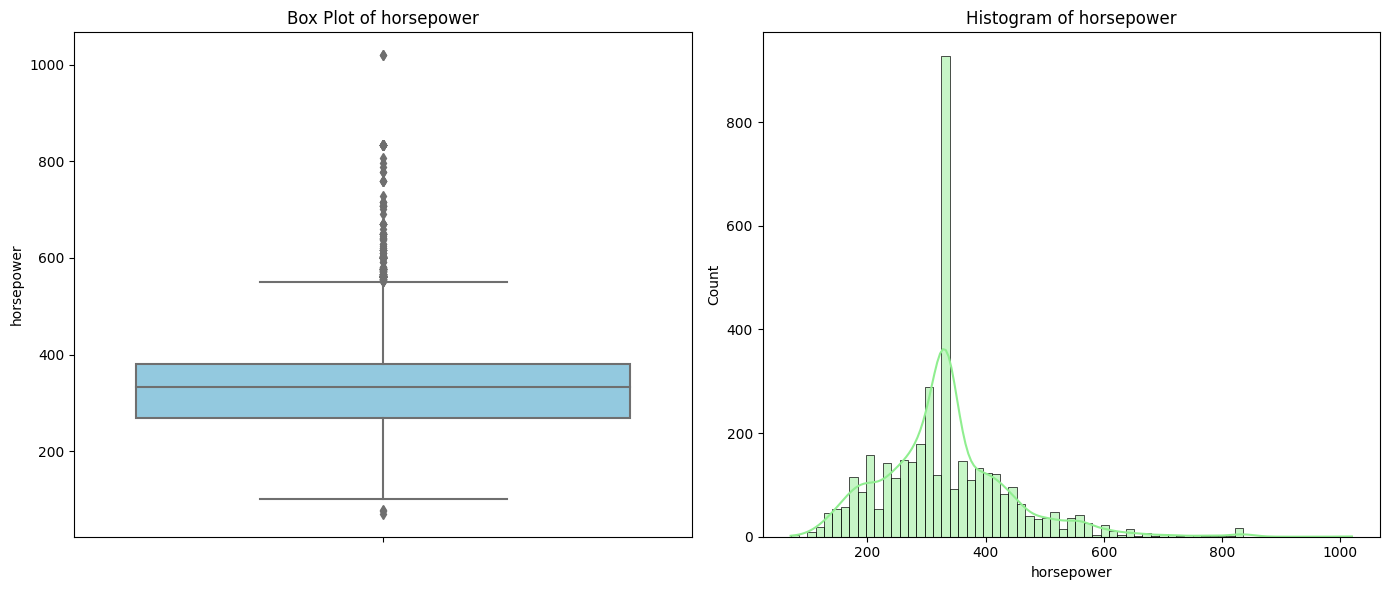

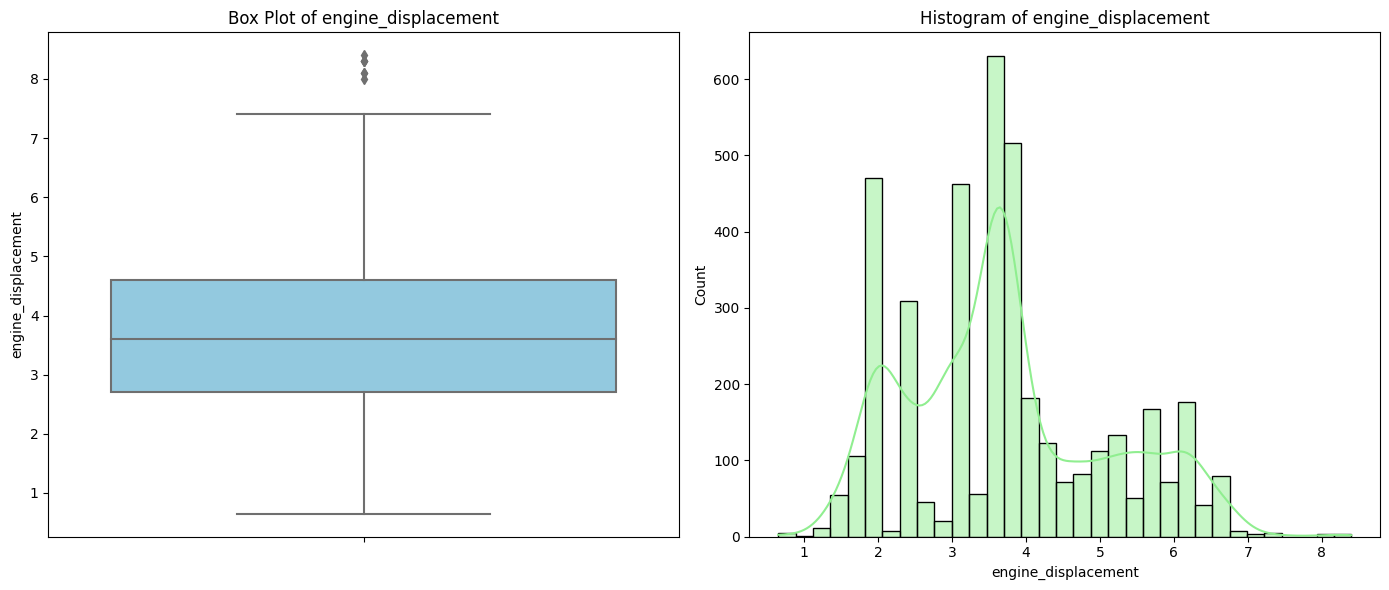

In [285]:
draw_plots(main)

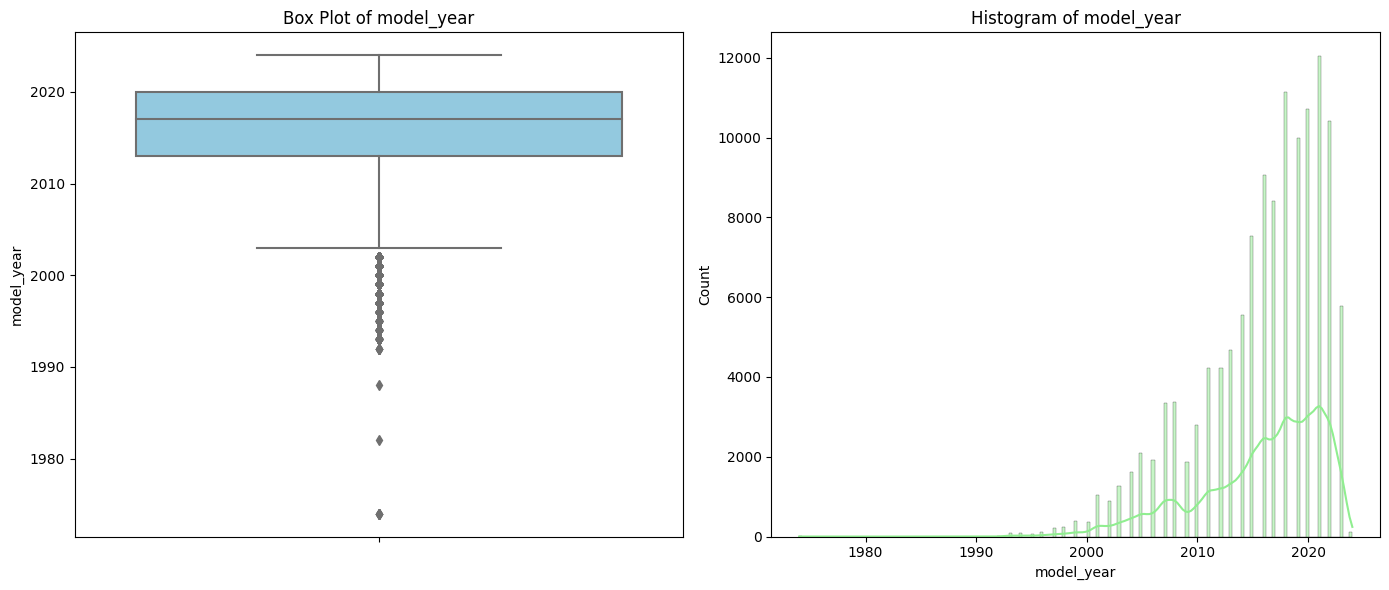

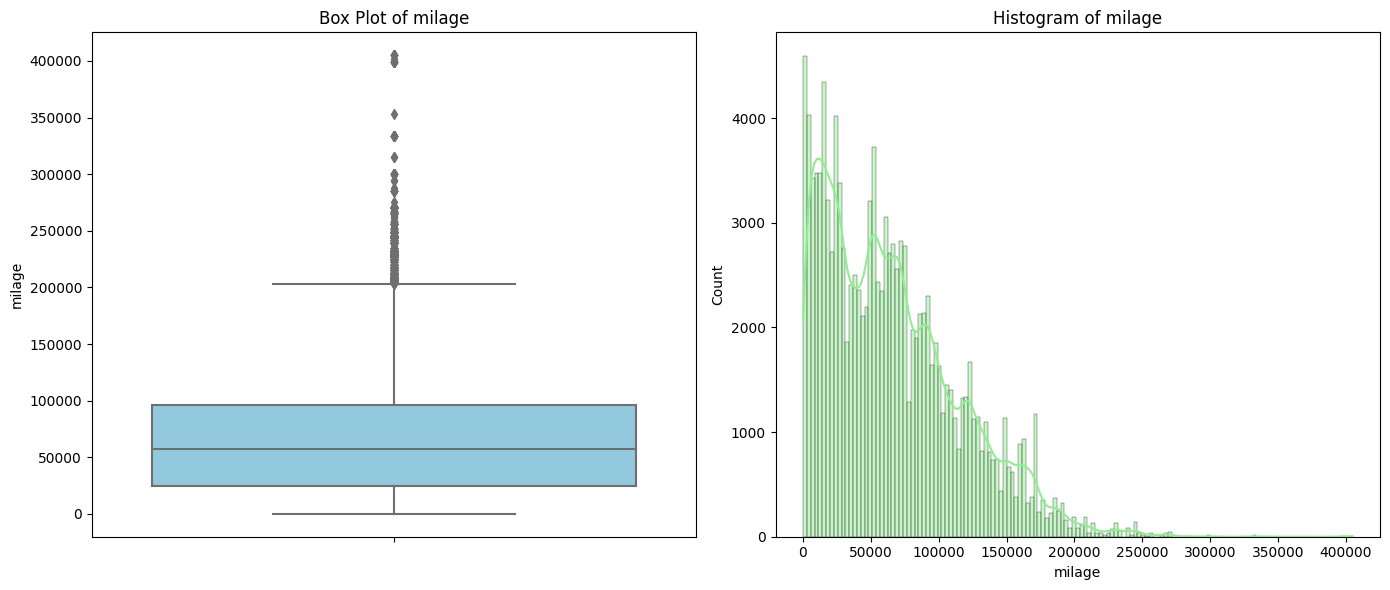

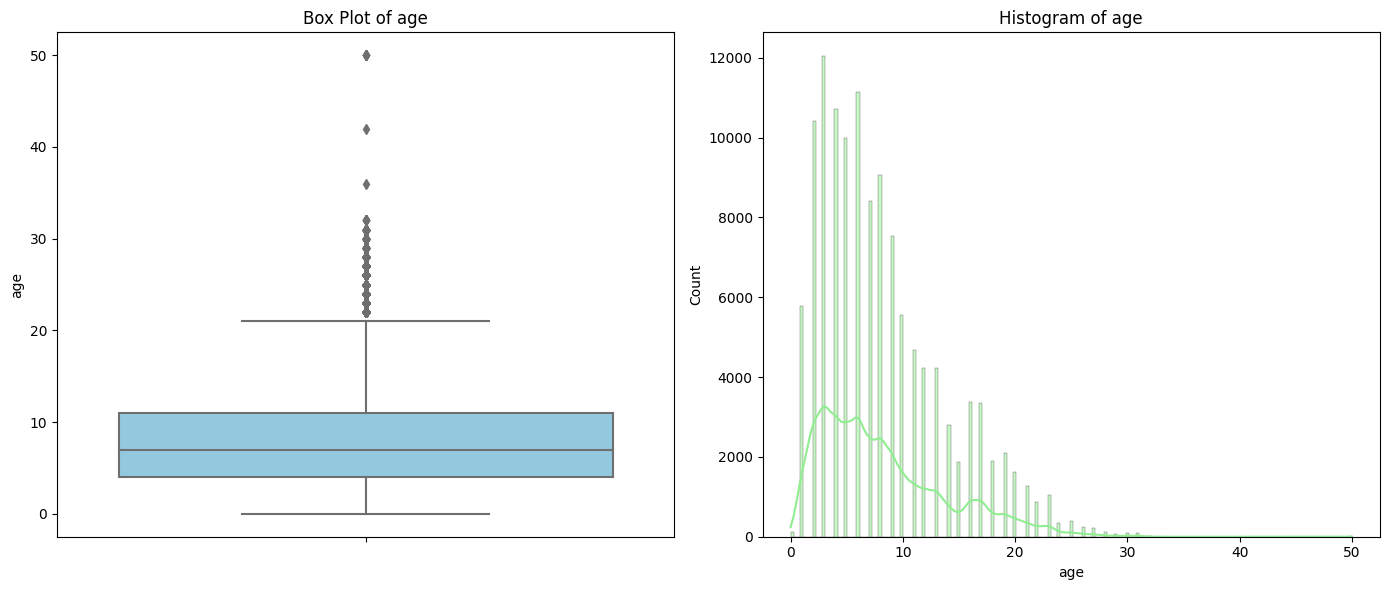

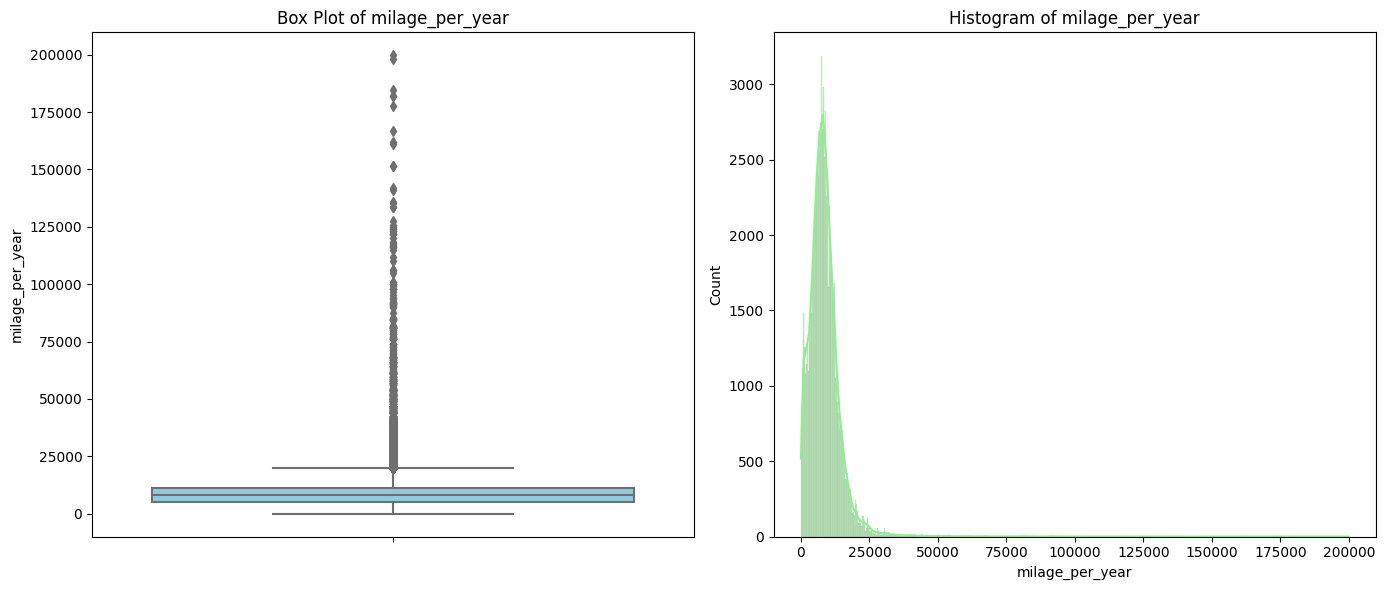

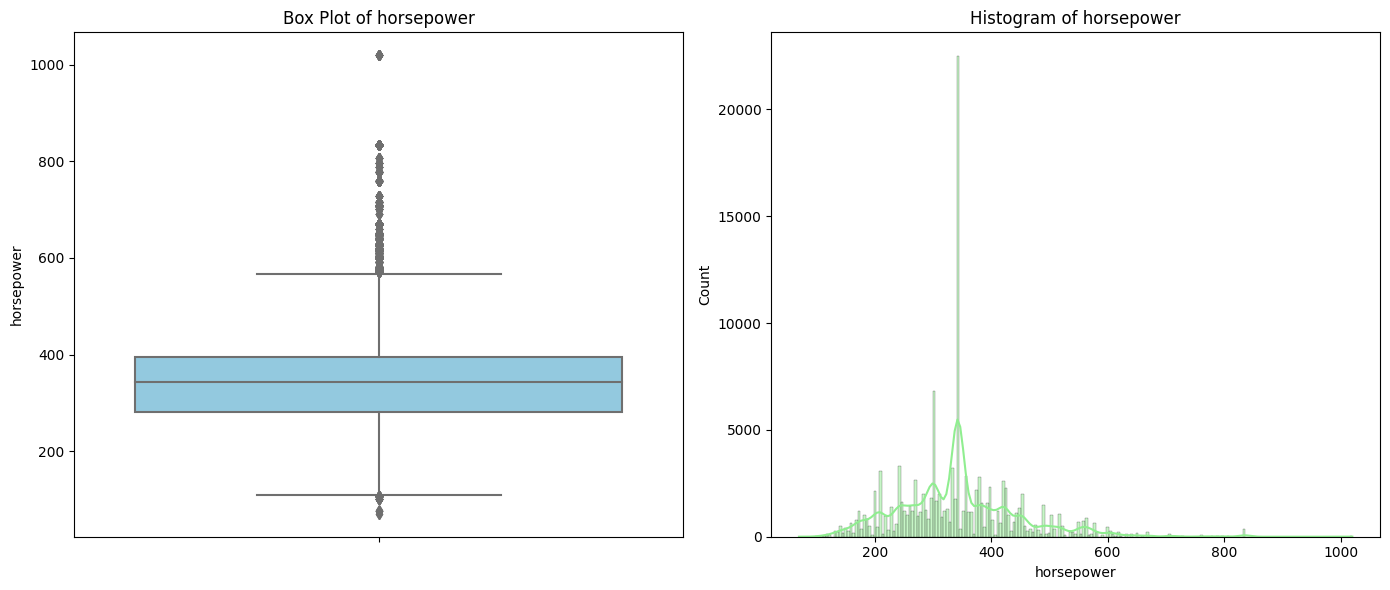

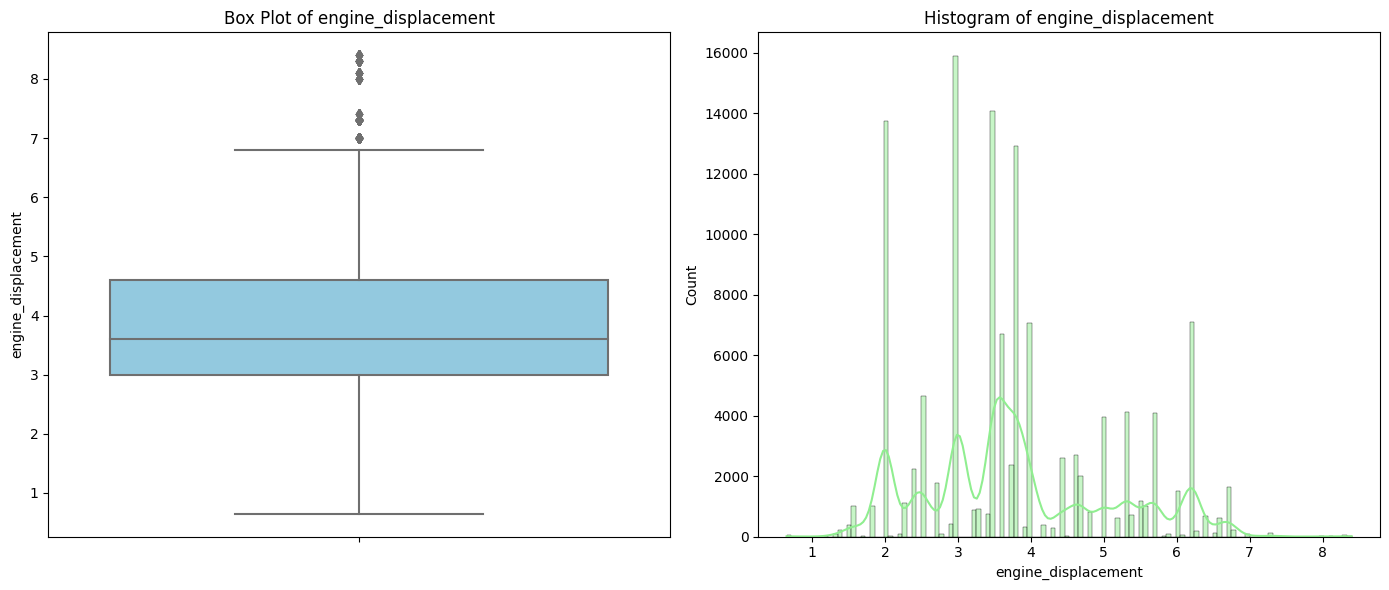

In [286]:
draw_plots(test)

In [287]:
def find_skewness(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # Calculate skewness for each numeric column
    skewness = df[numeric_columns].skew()
    
    # Print skewness for each column
    for col, skew_value in skewness.items():
        print(f'Skewness of {col}: {skew_value:.4f}')
    
    return skewness

In [288]:
skew_values = find_skewness(train)

Skewness of model_year: -1.0445
Skewness of milage: 0.8951
Skewness of price: 20.2685
Skewness of age: 1.0445
Skewness of milage_per_year: 5.4559
Skewness of horsepower: 0.8600
Skewness of engine_displacement: 0.4774


In [289]:
skew_values = find_skewness(main)

Skewness of model_year: -1.0892
Skewness of milage: 1.1600
Skewness of price: 19.5136
Skewness of age: 1.0892
Skewness of milage_per_year: 1.3841
Skewness of horsepower: 1.0604
Skewness of engine_displacement: 0.5105


In [290]:
skew_values = find_skewness(test)

Skewness of model_year: -1.0365
Skewness of milage: 0.9099
Skewness of age: 1.0365
Skewness of milage_per_year: 5.6571
Skewness of horsepower: 0.8609
Skewness of engine_displacement: 0.4860


In [291]:
def plot_categorical_columns(df):
    # Select only categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Loop through each categorical column and plot
    for col in categorical_columns:
        if len(set(df[col]))<150:
            plt.figure(figsize=(10, 8))
            sns.countplot(y=df[col], palette="Set2", order=df[col].value_counts().index)
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

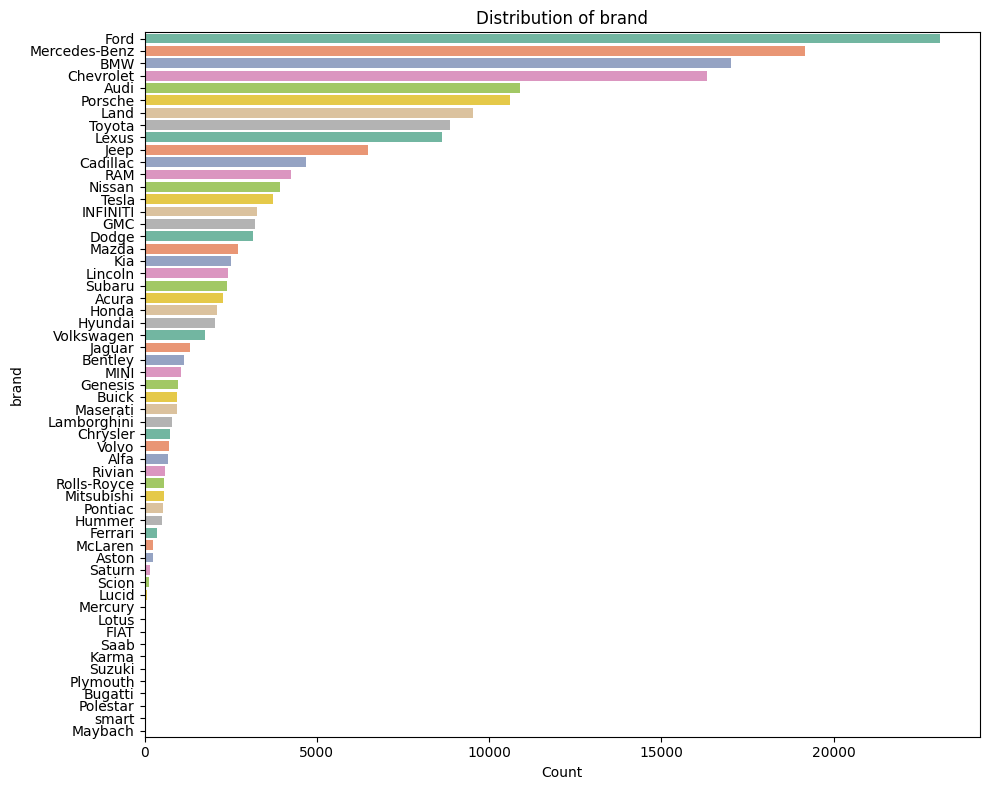

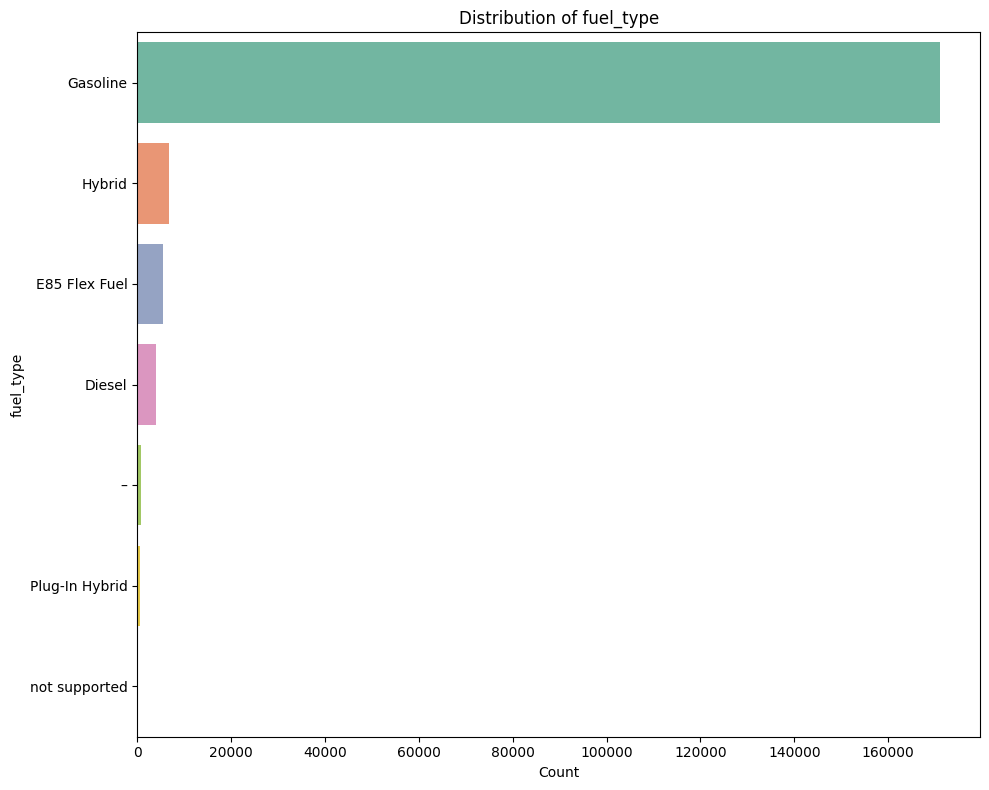

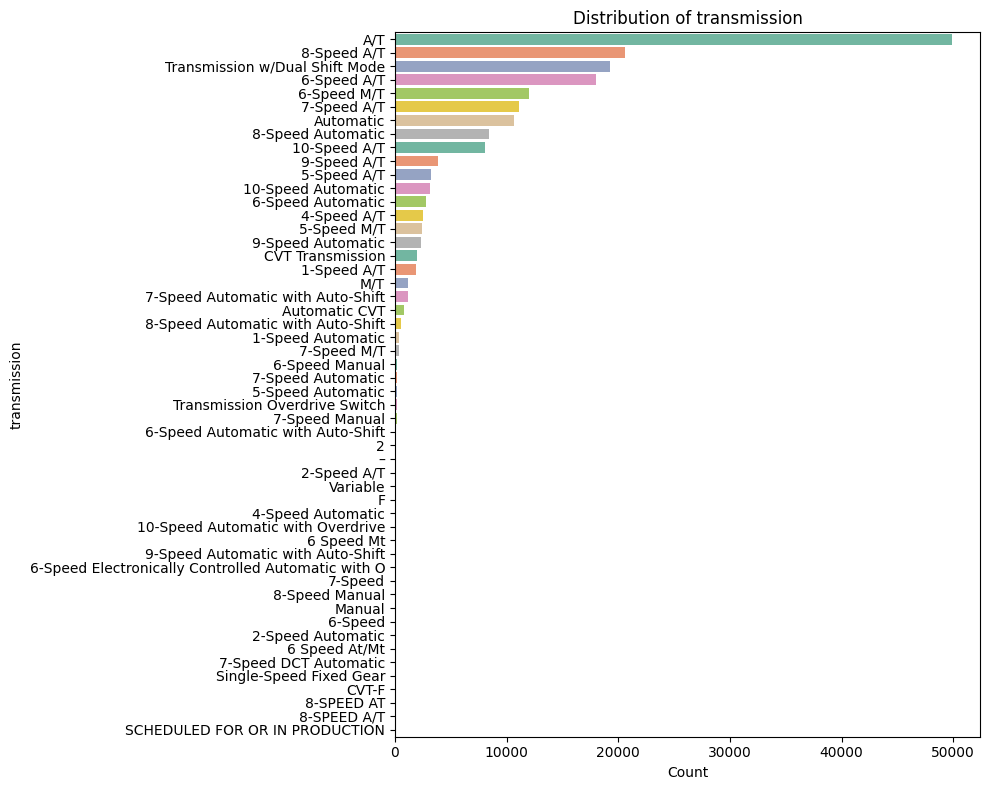

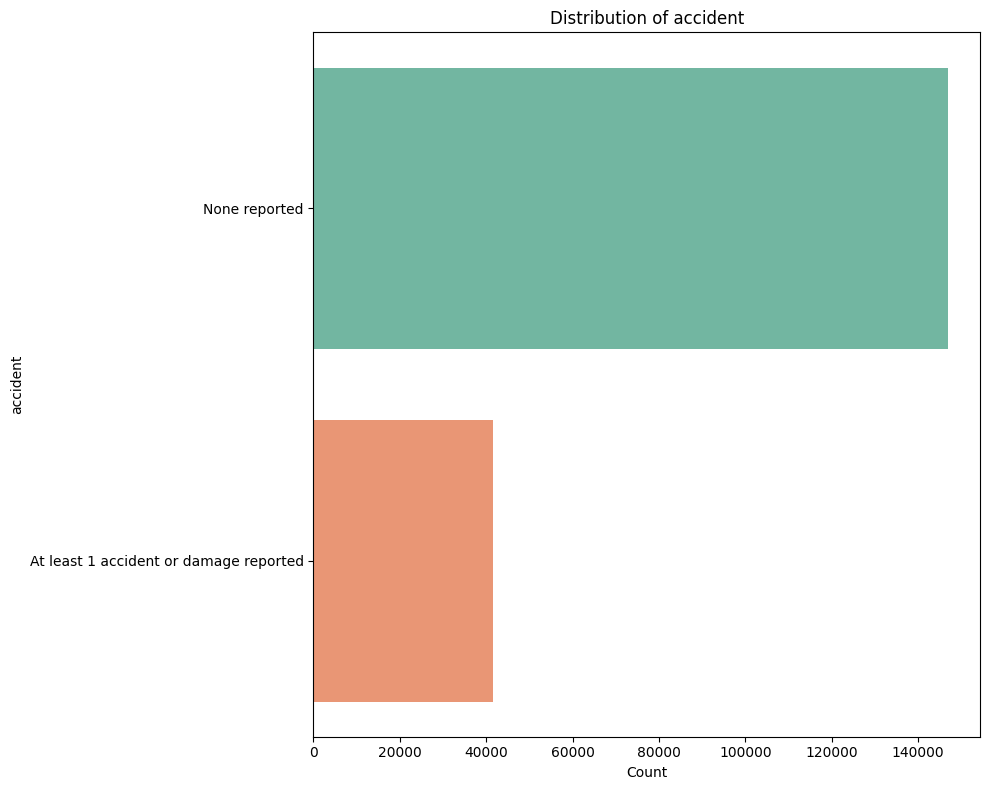

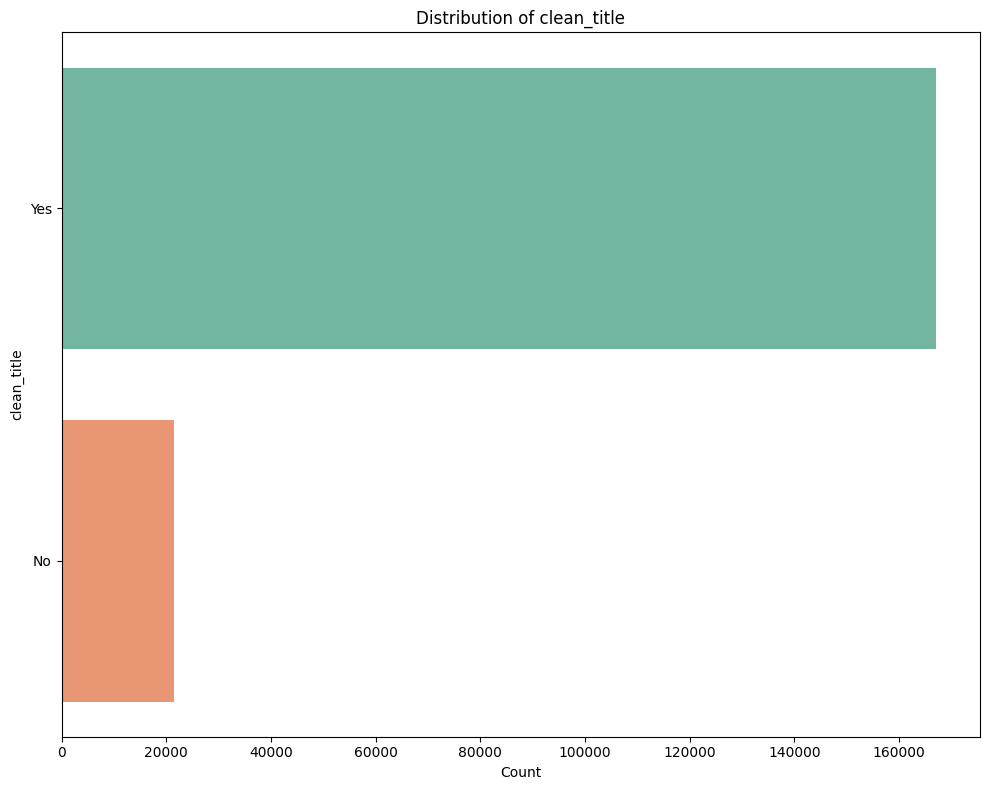

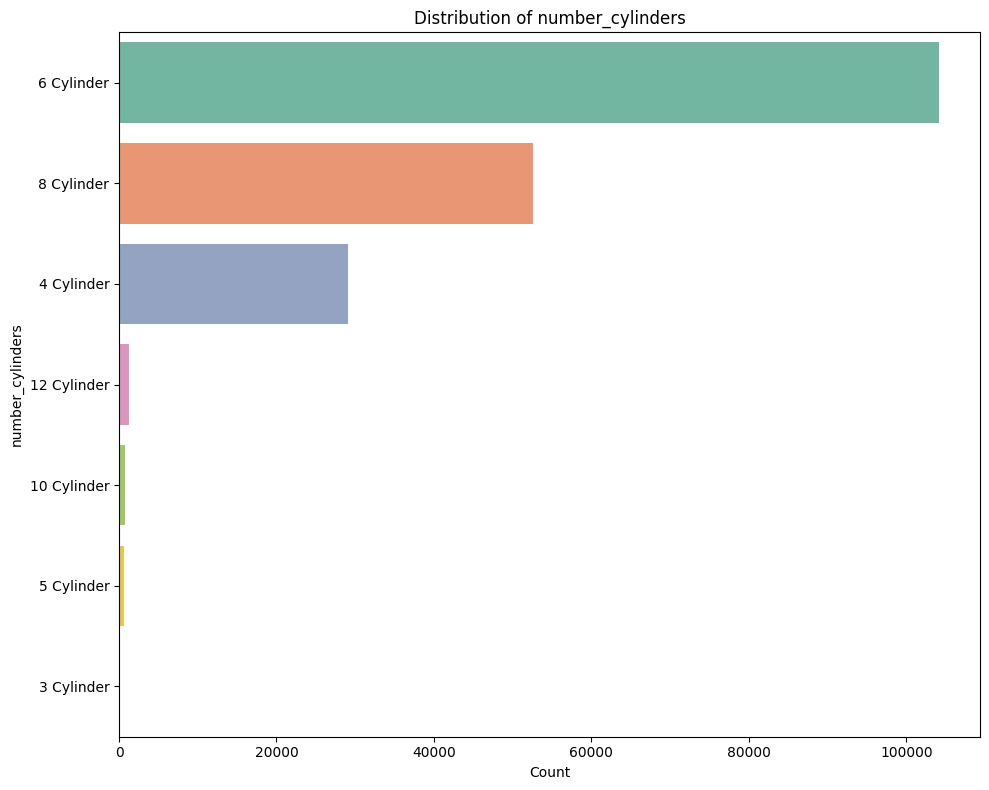

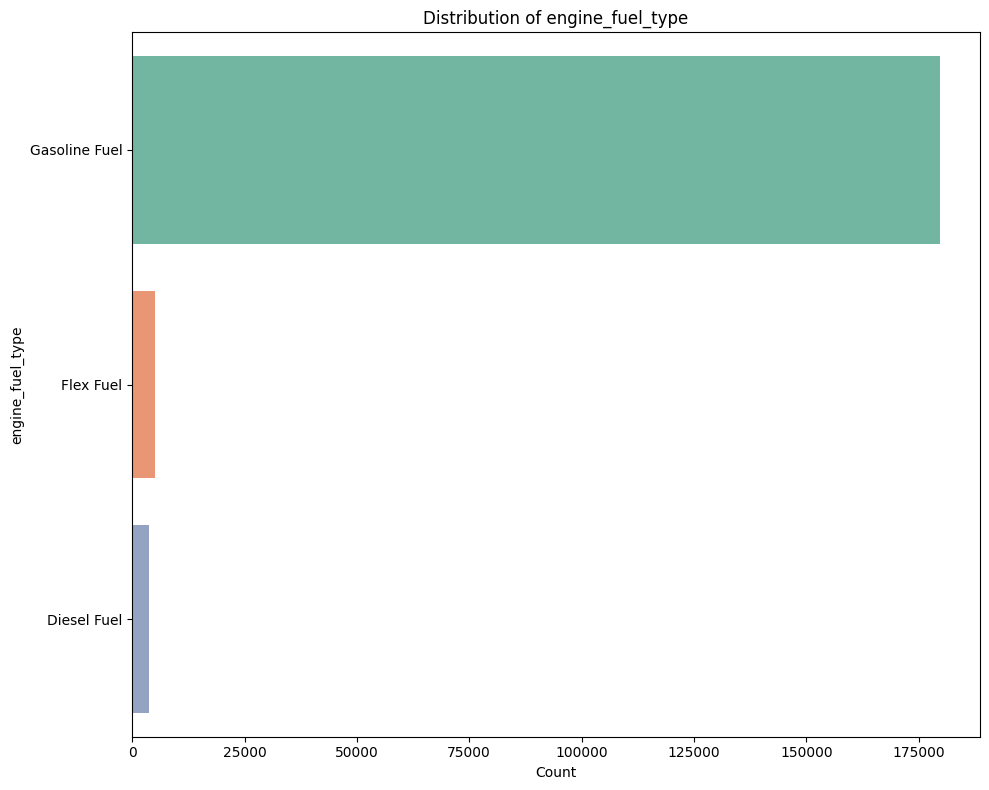

In [292]:
plot_categorical_columns(train)

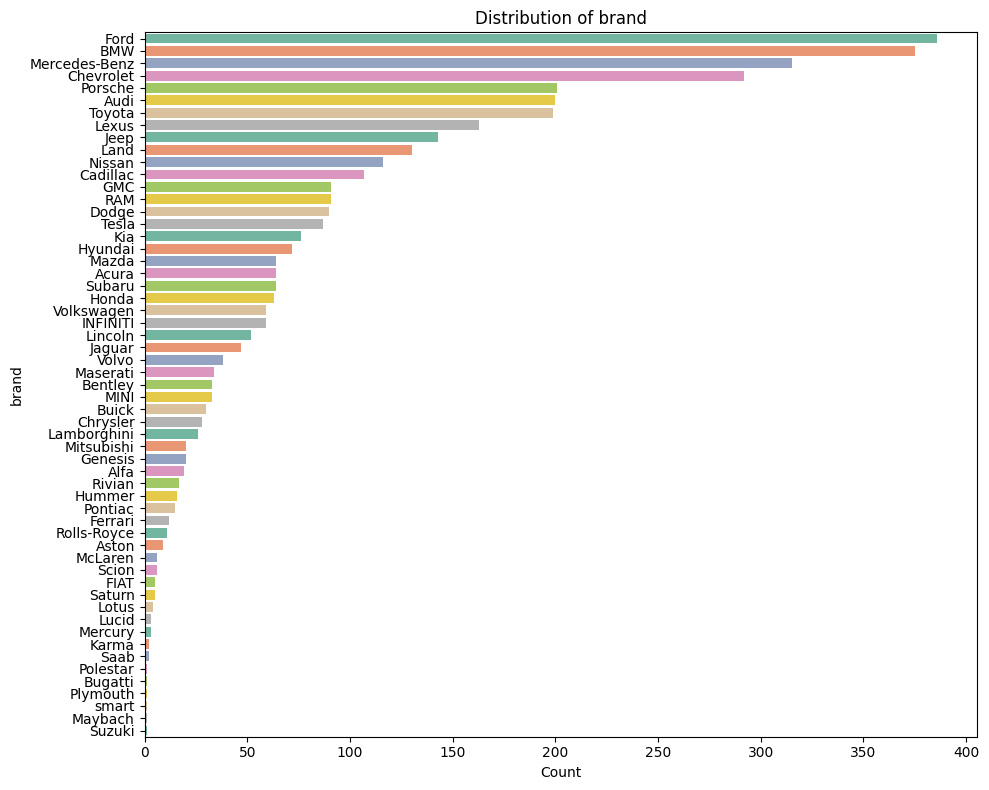

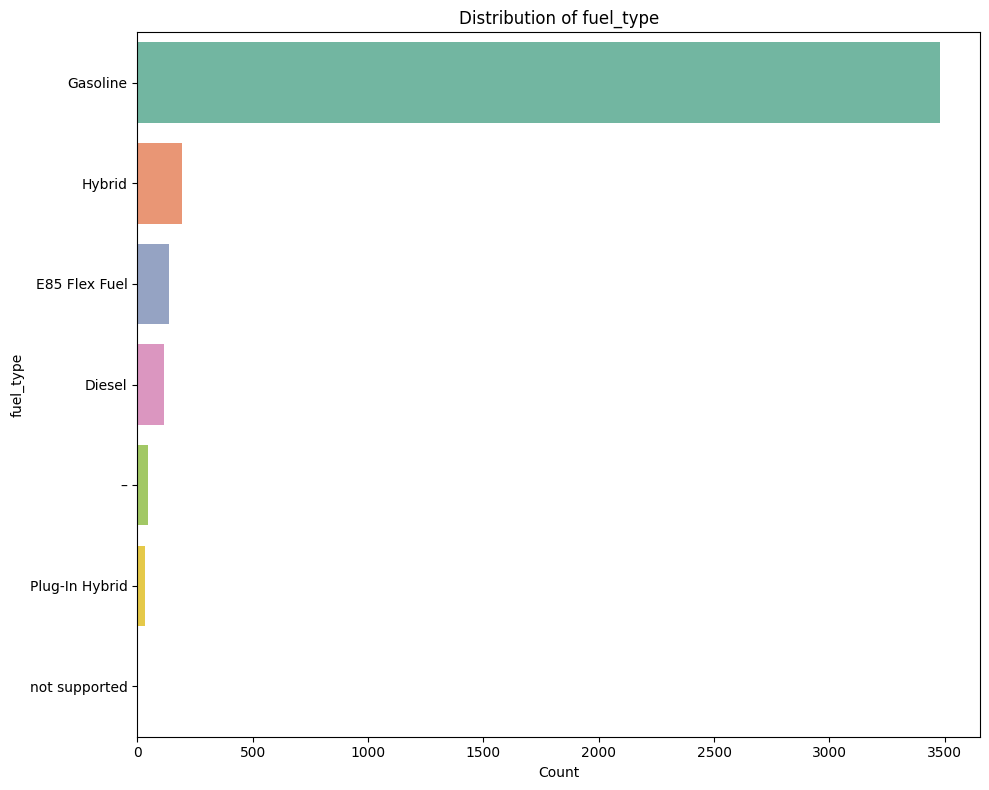

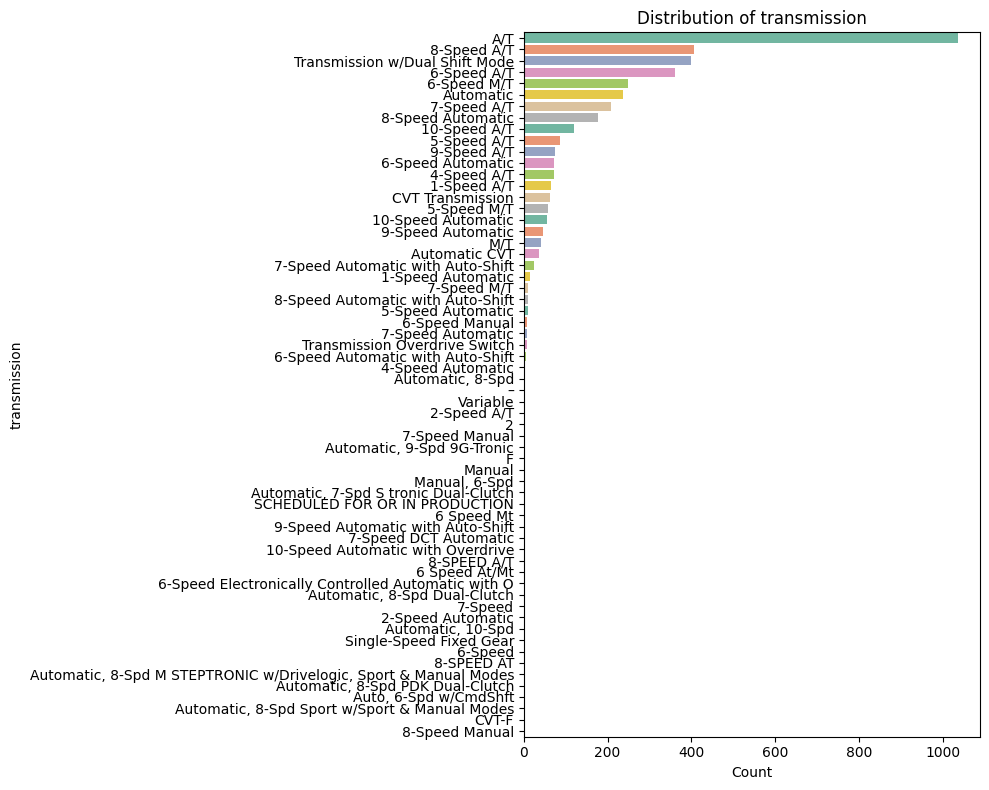

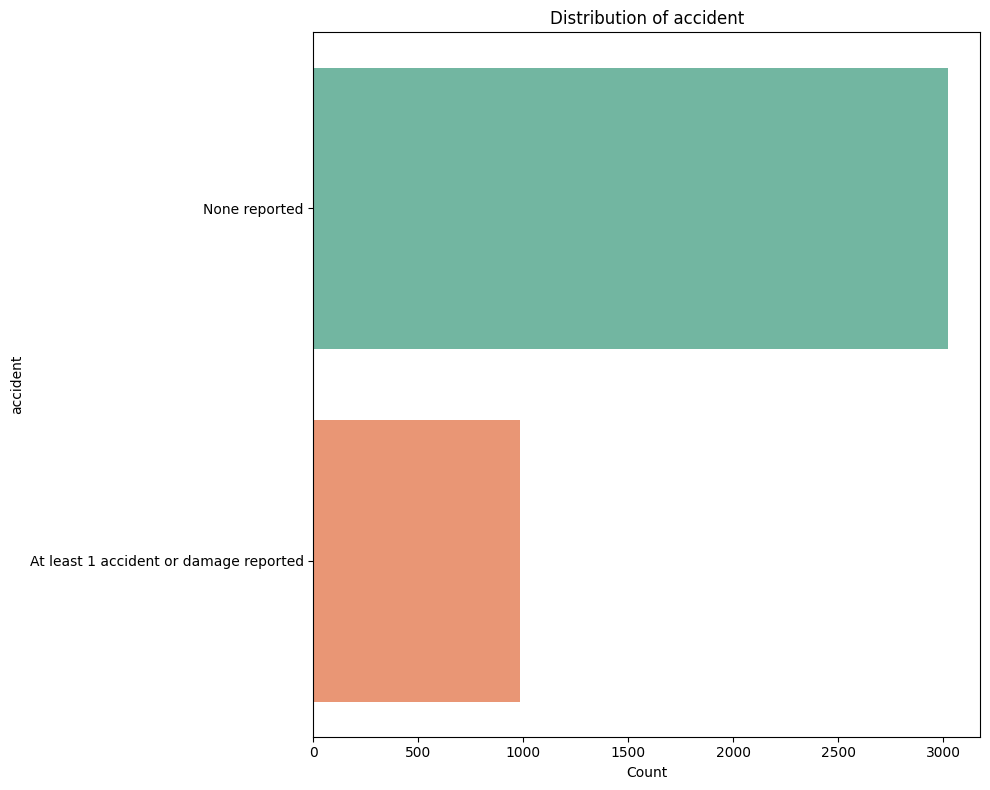

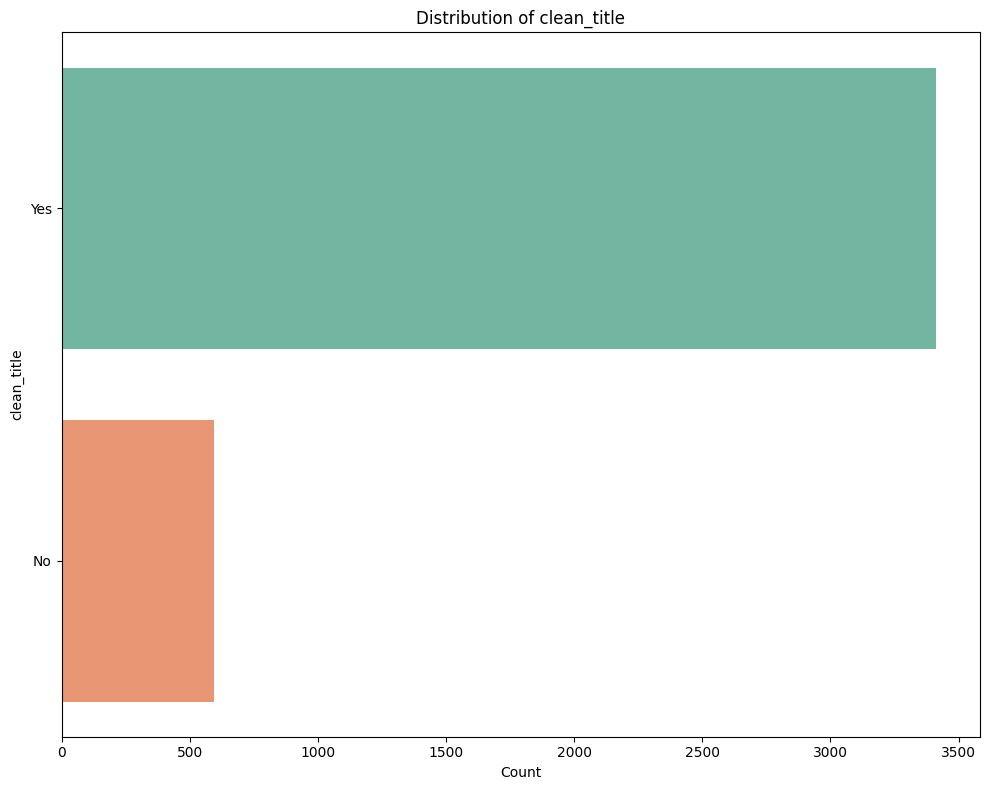

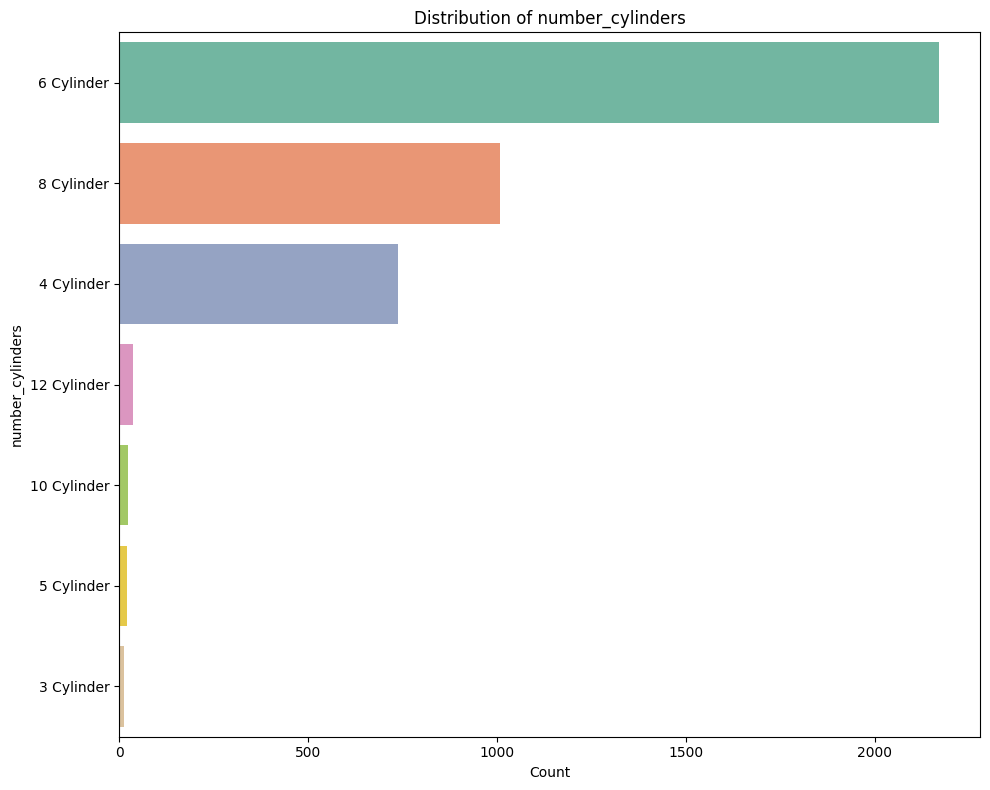

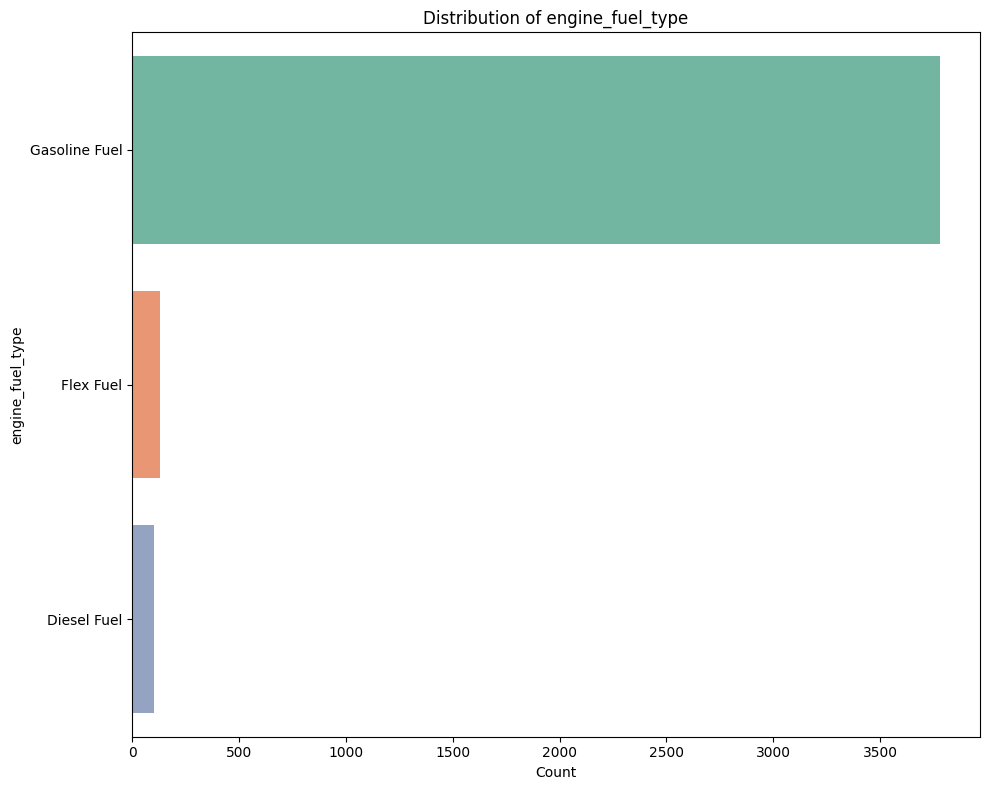

In [293]:
plot_categorical_columns(main)

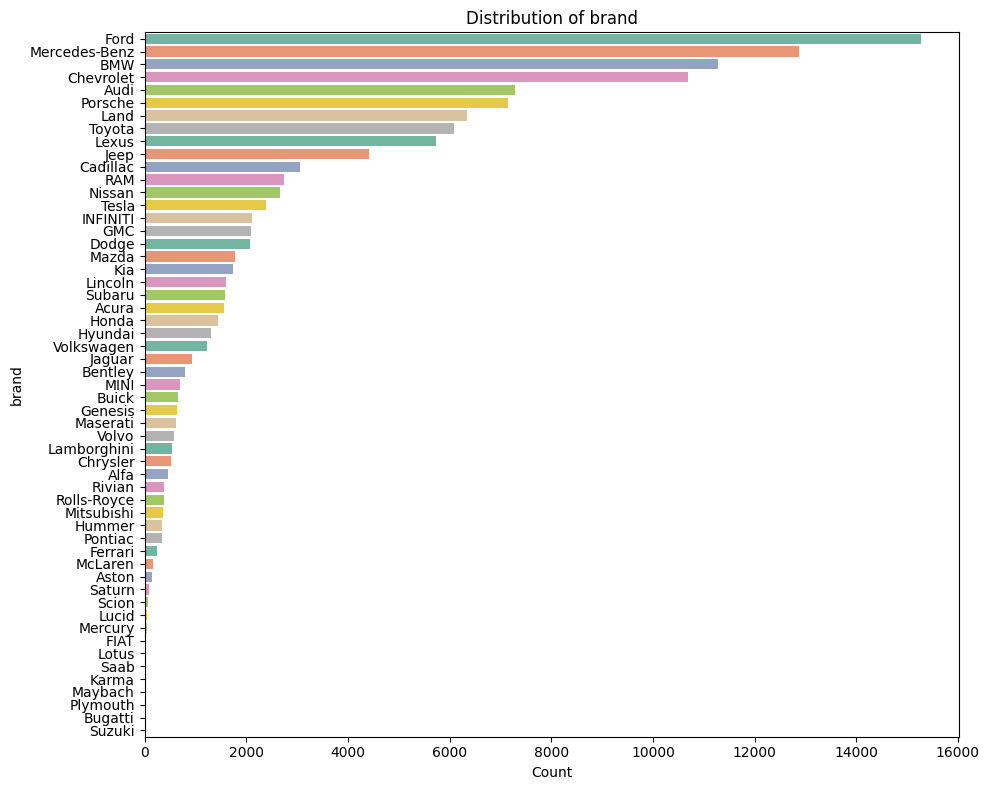

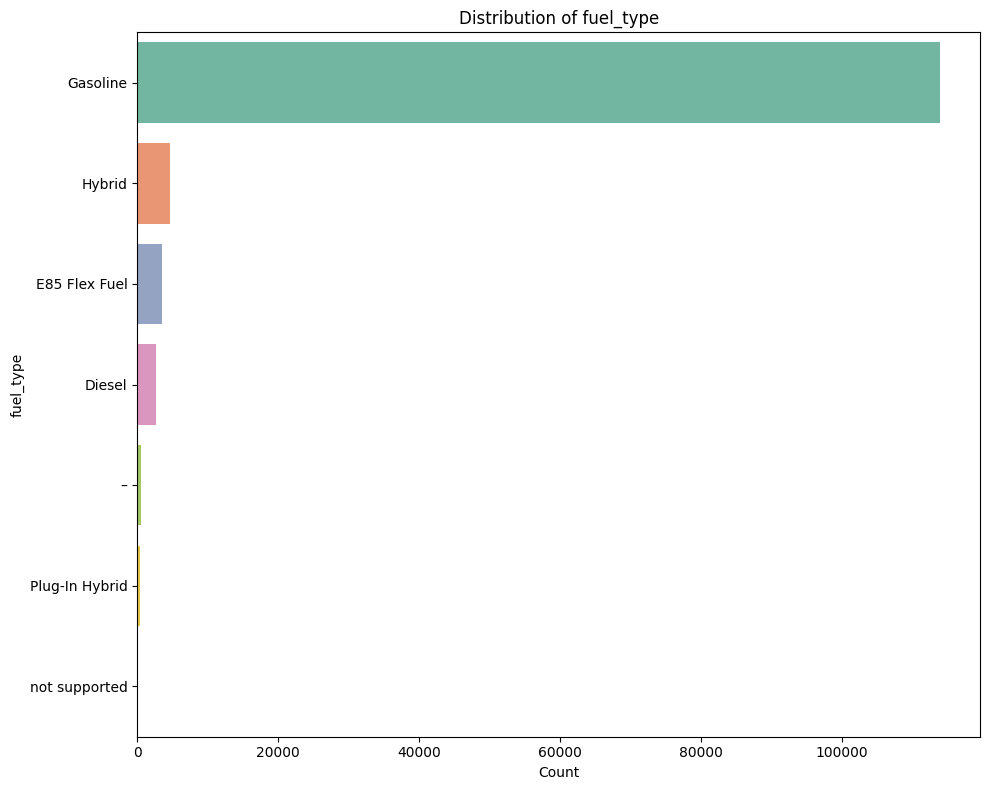

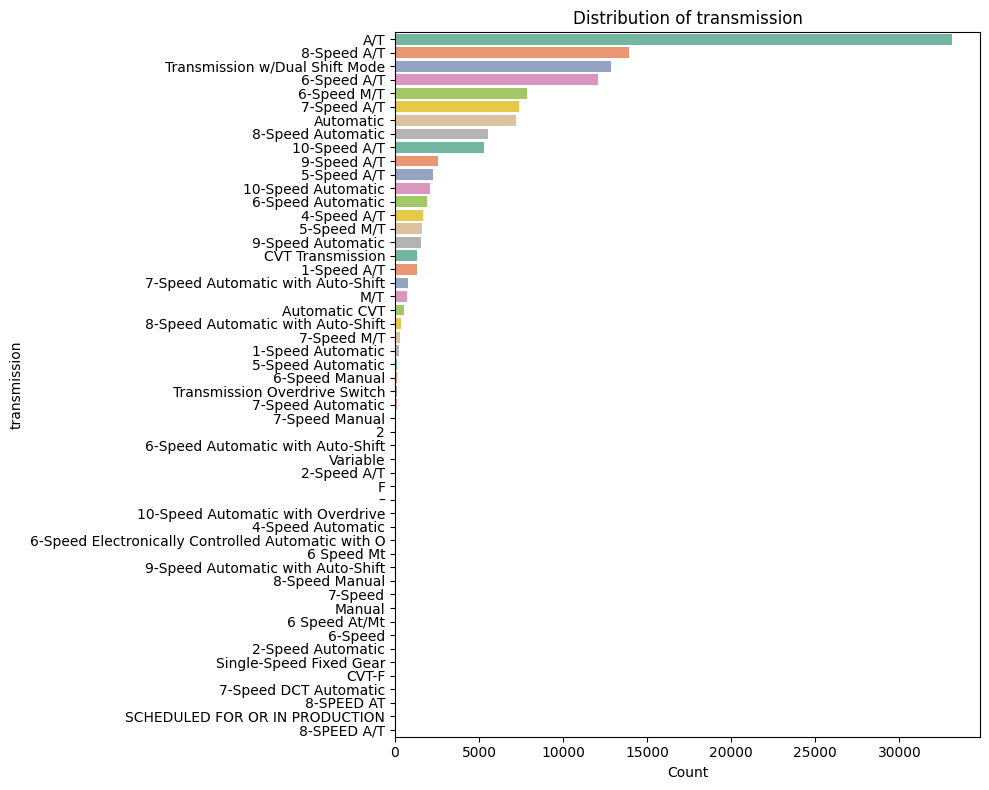

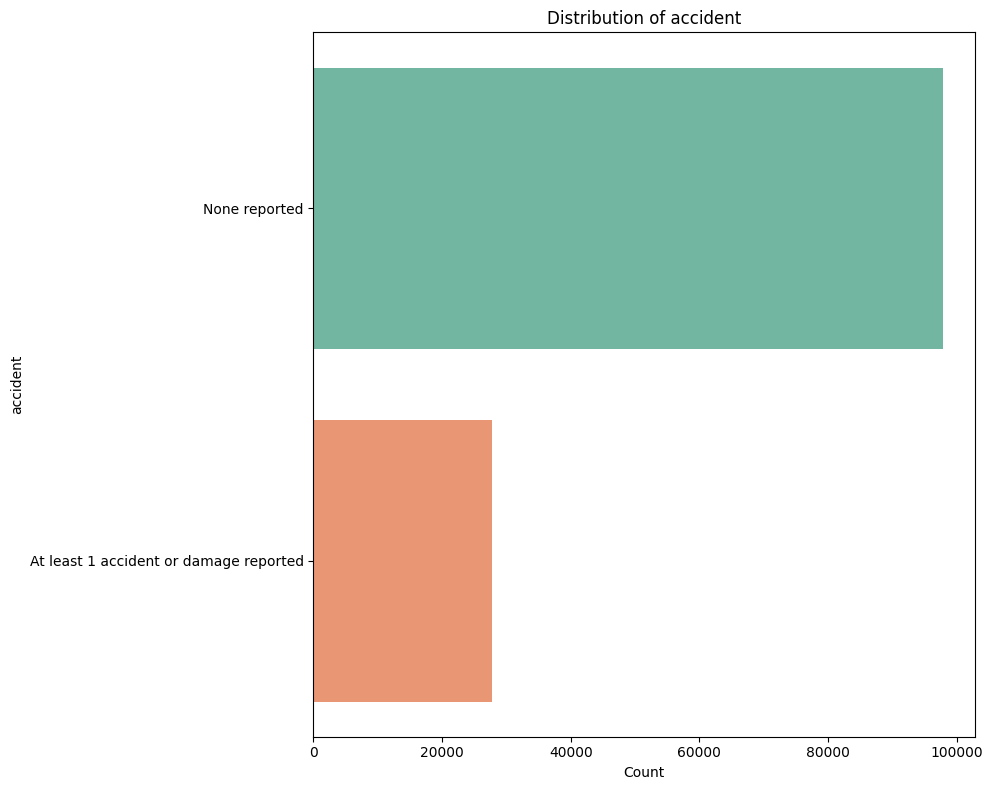

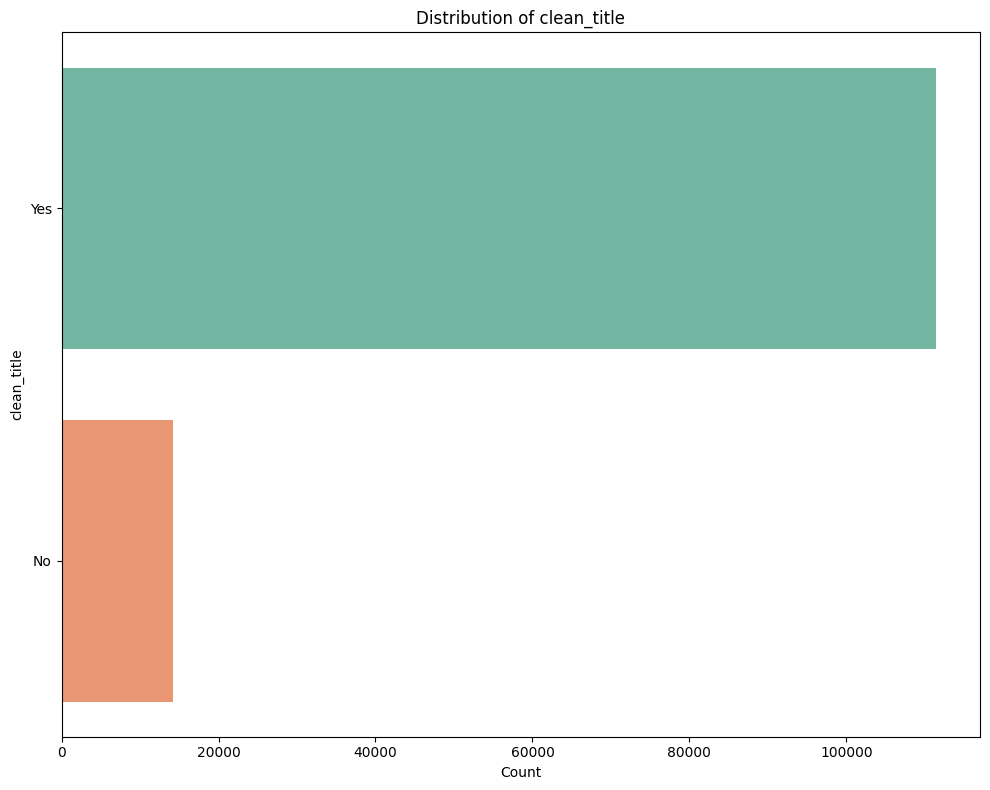

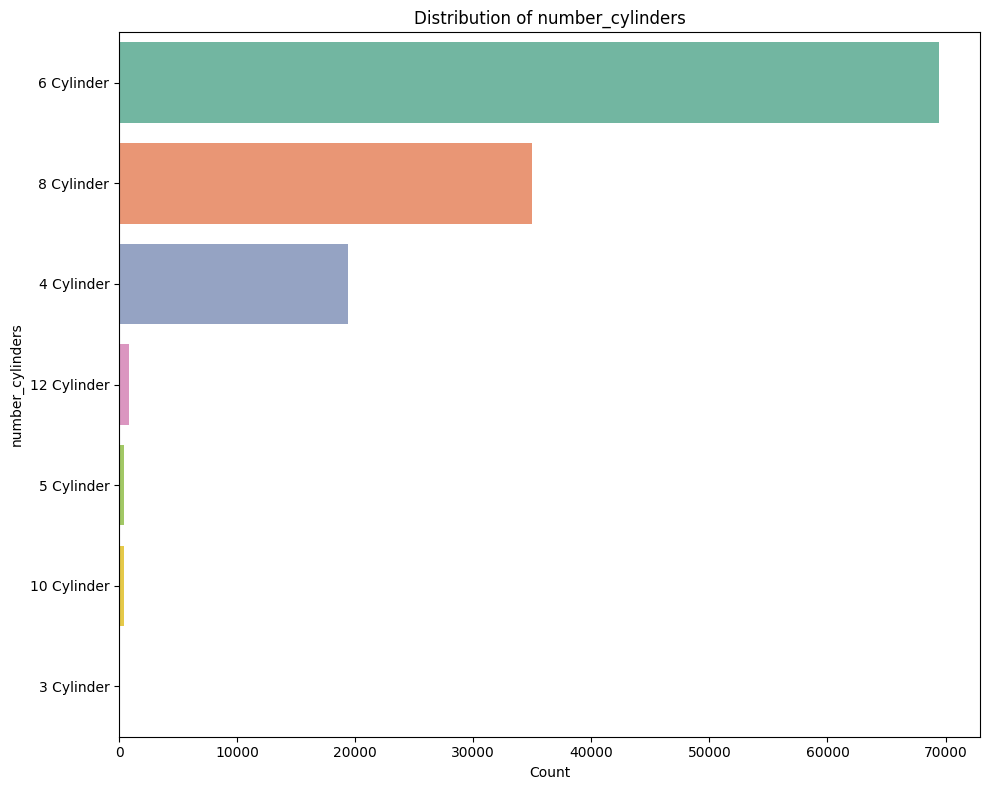

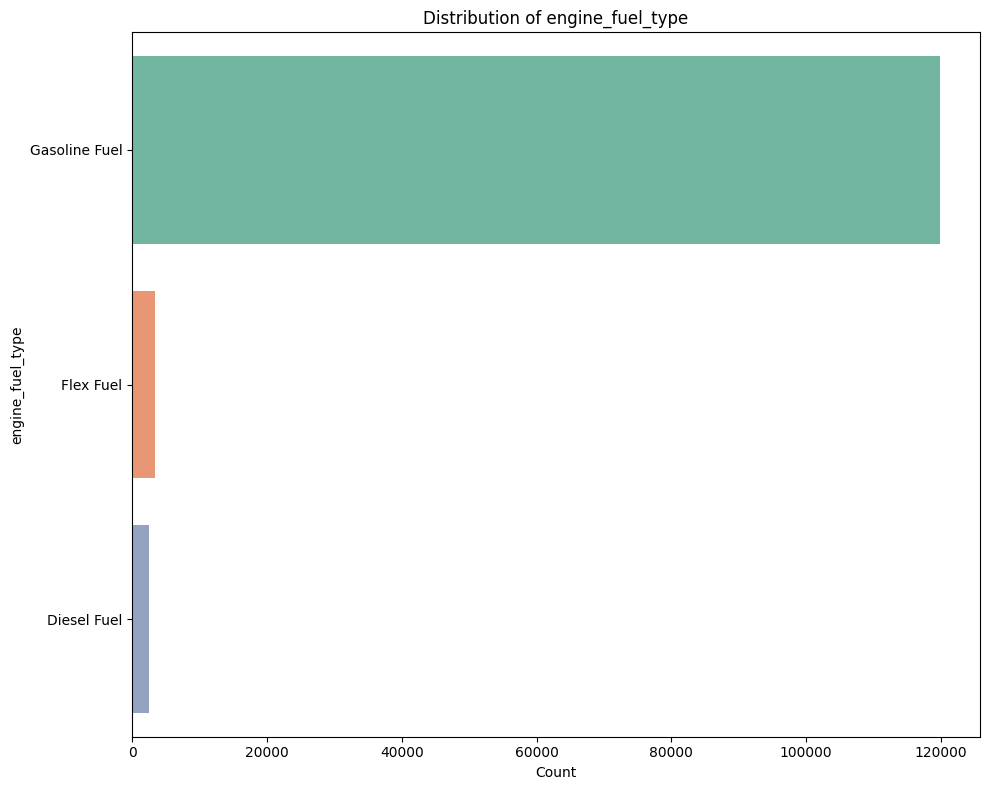

In [294]:
plot_categorical_columns(test)